In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

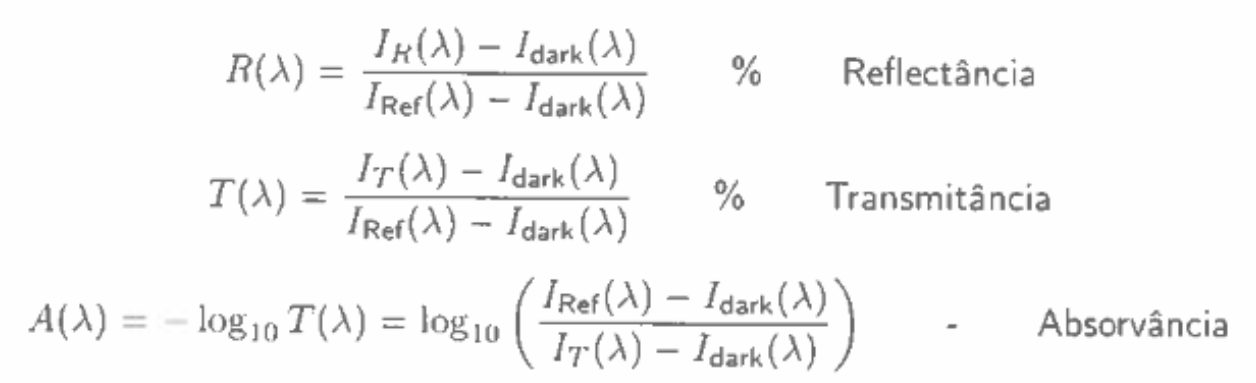

In [2]:
excel = pd.read_excel('filtros-code-ready.xlsx').to_numpy().T
xx = excel[0]
verdeT = excel[1]
verdeR = excel[2]
rosaT = excel[3]
rosaR = excel[4]
amareloT = excel[5]
amareloR = excel[6]
laranjaT = excel[7]
laranjaR = excel[8]
darkT = excel[9]
darkR = excel[10]
verdeTP = excel[11]
verdeRP = excel[12]
laranjaTP = excel[13]
laranjaRP = excel[14]
refTP0 = excel[15]
refRP0 = excel[16]

In [3]:
## RESTRINGIR DO ind=610 - ind=1050
print(xx[610])
print(xx[1050])

446.041
630.404


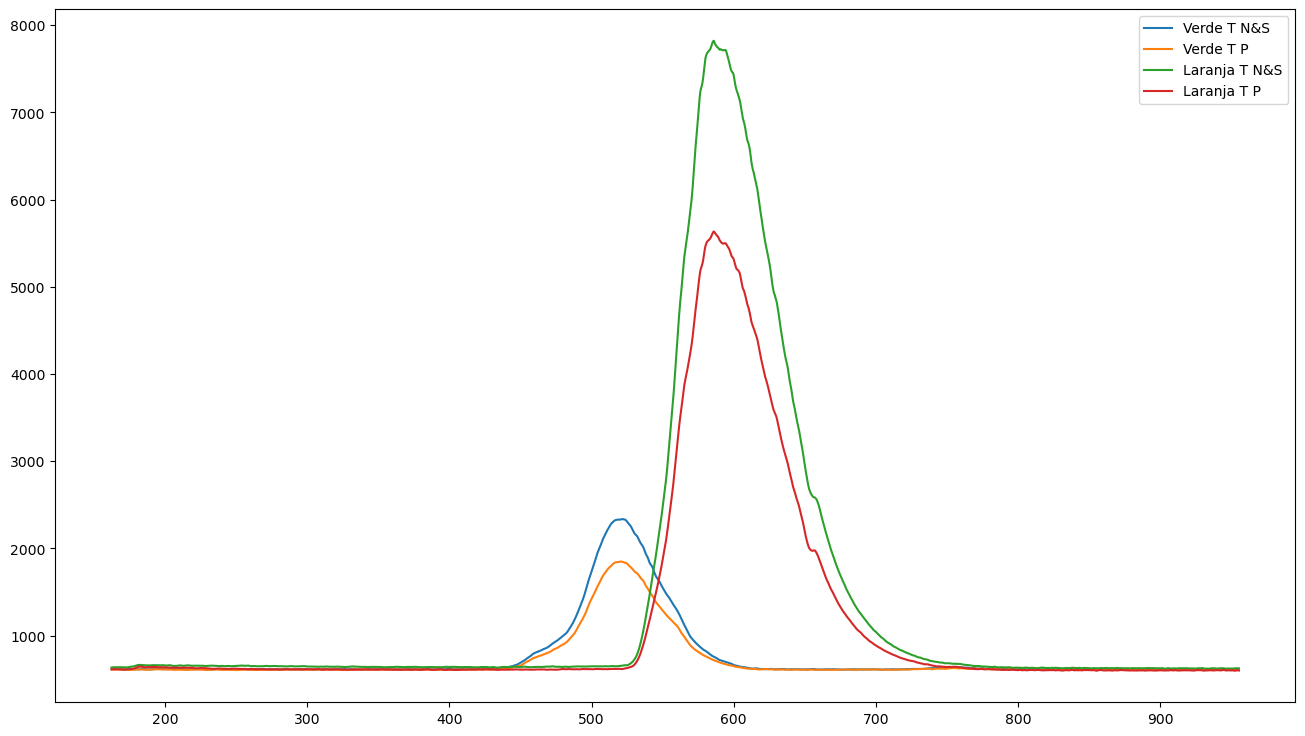

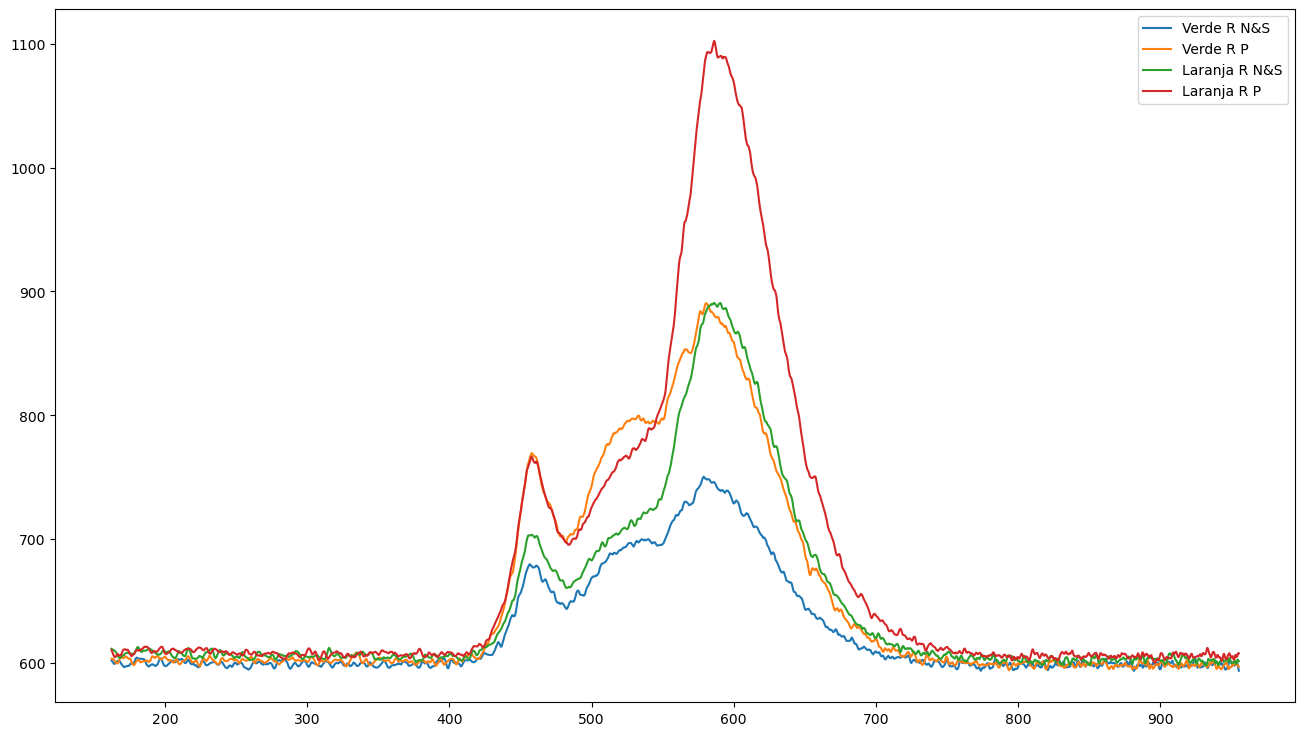

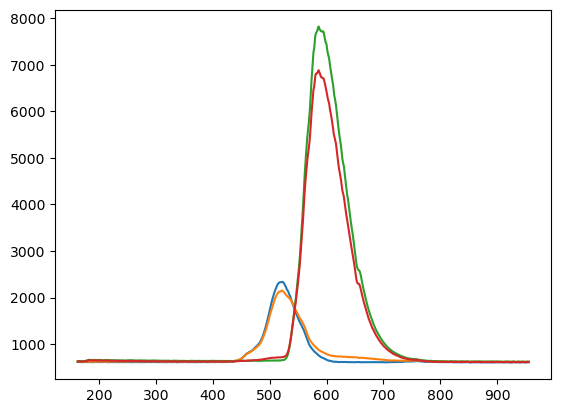

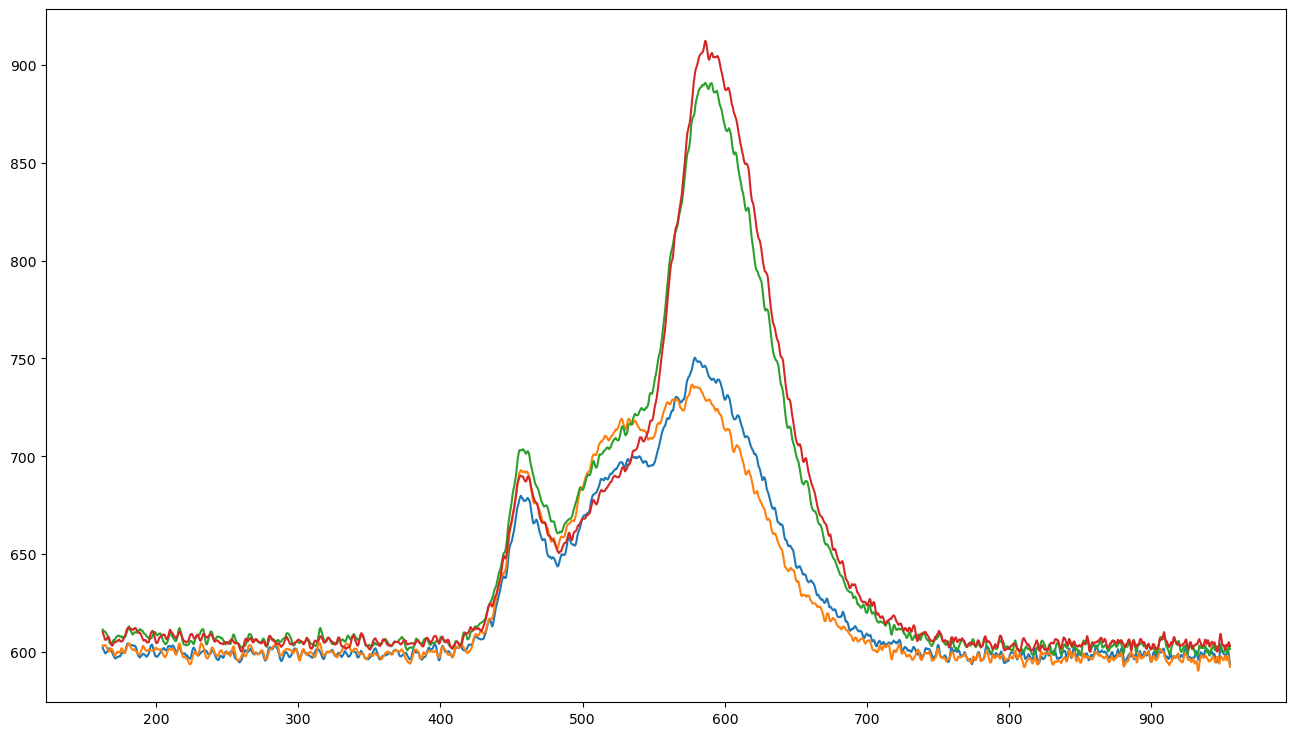

In [4]:
## PIPI vs Nós:

plt.figure(figsize=(16,9))
plt.plot(xx,verdeT, label="Verde T N&S")
plt.plot(xx,verdeTP, label="Verde T P")

plt.plot(xx,laranjaT, label="Laranja T N&S")
plt.plot(xx,laranjaTP, label="Laranja T P")
plt.legend()
plt.show()

plt.figure(figsize=(16,9))
plt.plot(xx,verdeR, label="Verde R N&S")
plt.plot(xx,verdeRP, label="Verde R P")
plt.plot(xx,laranjaR, label="Laranja R N&S")
plt.plot(xx,laranjaRP, label="Laranja R P")
plt.legend()
plt.show()


relVT = verdeT/verdeTP
relLT = laranjaT/laranjaTP
# relT = 0.5*(np.max(relVT) + np.max(relLT))
relT = 0.5*(relVT + relLT)

plt.plot(xx,verdeT)
plt.plot(xx,verdeTP*relT)
plt.plot(xx,laranjaT)
plt.plot(xx,laranjaTP*relT)
plt.show()

relVR = verdeR/verdeRP
relLR = laranjaR/laranjaRP
# relR = 0.5*(np.max(relVR) + np.max(relLR))
relR = 0.5*(relVR + relLR)

plt.figure(figsize=(16,9))
plt.plot(xx,verdeR)
plt.plot(xx,verdeRP*relR)
plt.plot(xx,laranjaR)
plt.plot(xx,laranjaRP*relR)



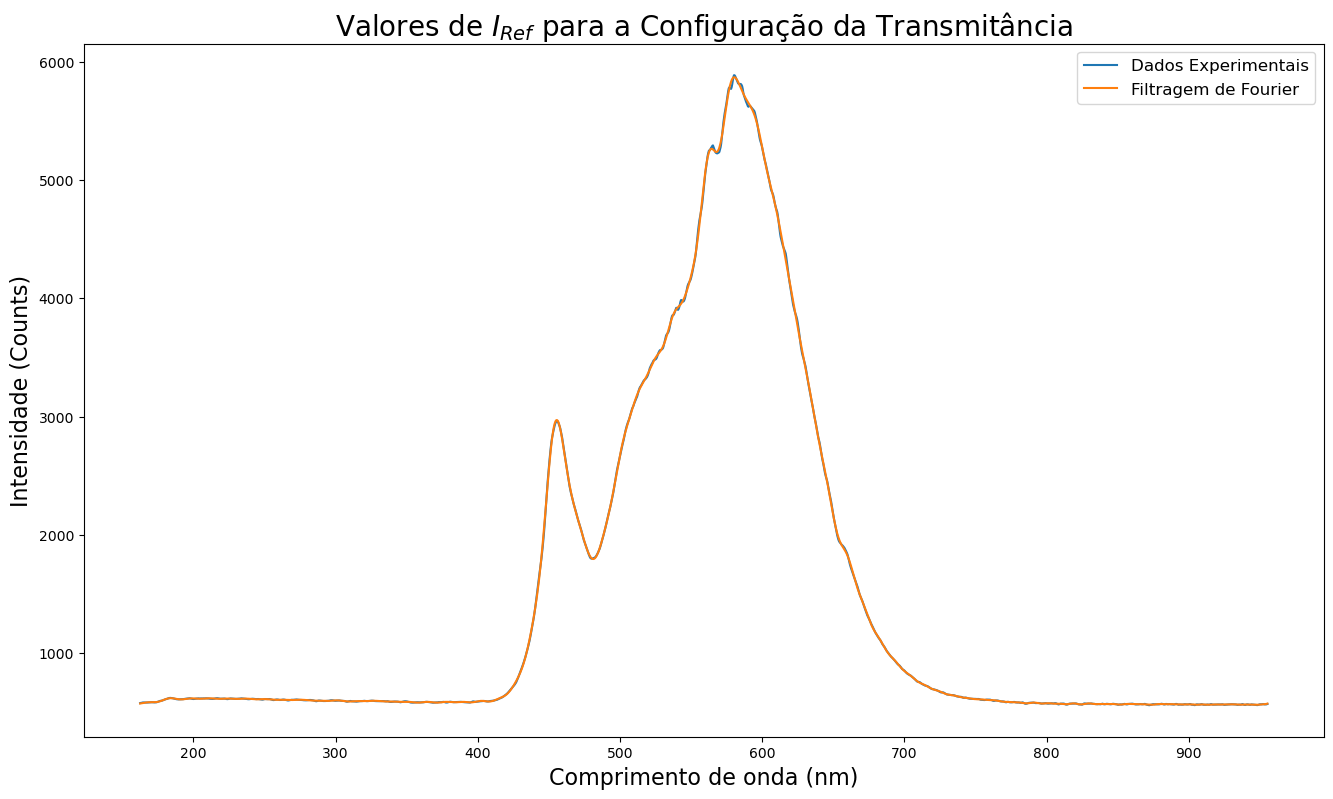

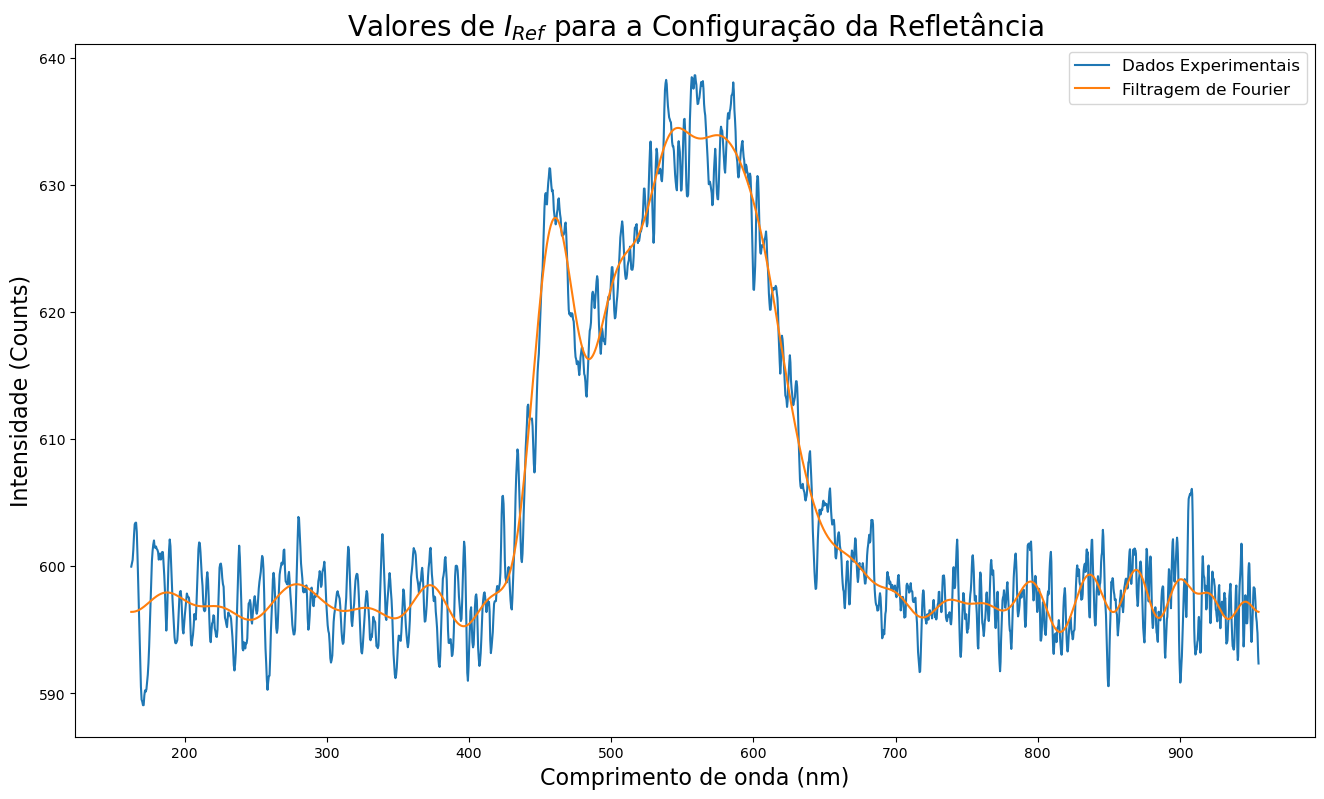

In [5]:
# REF-T
refTP =  refTP0*relT

ck = np.fft.rfft(refTP)
ck[75:] *= 0
refTP2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{Ref}$ para a Configuração da Transmitância", fontsize=20)
plt.plot(xx,refTP, label="Dados Experimentais")
plt.plot(xx,refTP2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

# REF-R
refRP =  refRP0*relR

ck = np.fft.rfft(refRP)
ck[25:] *= 0
refRP2 = np.fft.irfft(ck)
plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{Ref}$ para a Configuração da Refletância", fontsize=20)
plt.plot(xx,refRP, label="Dados Experimentais")
plt.plot(xx,refRP2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

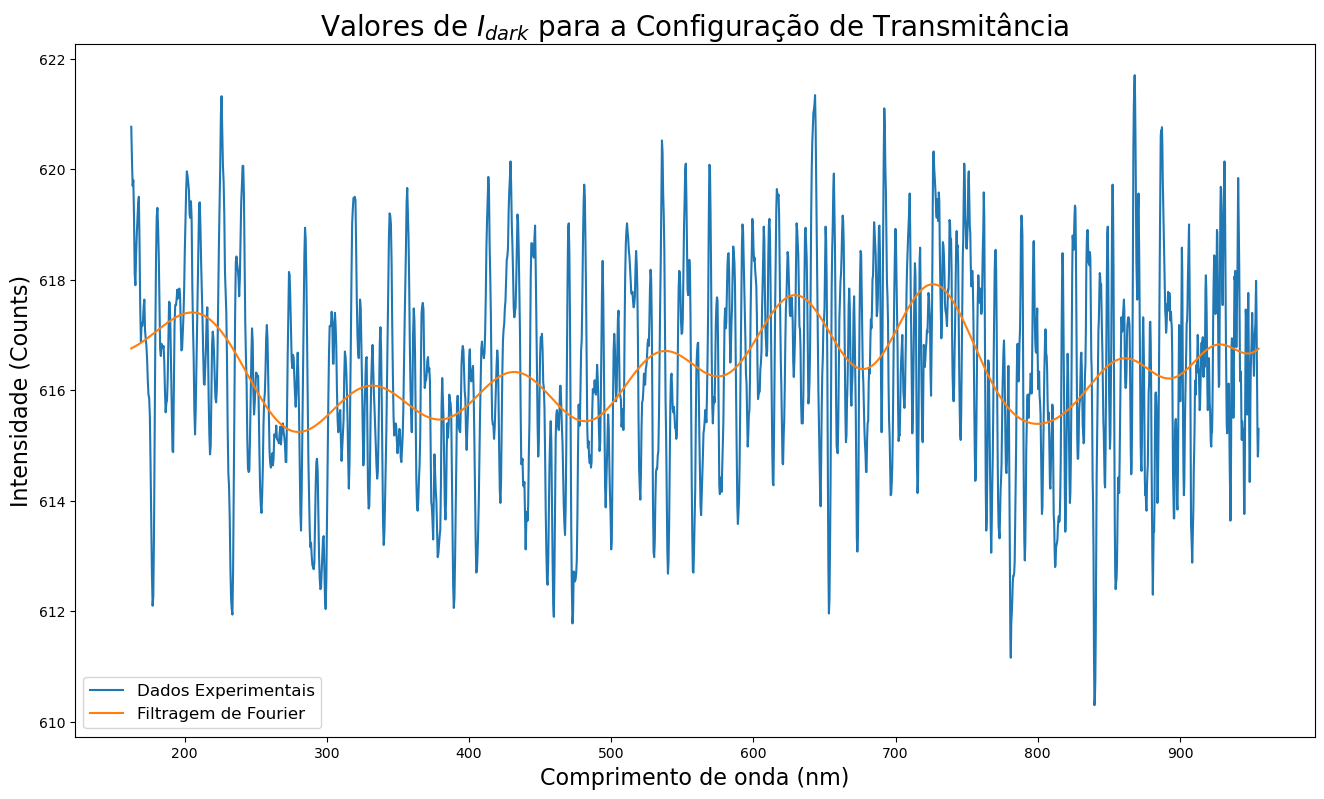

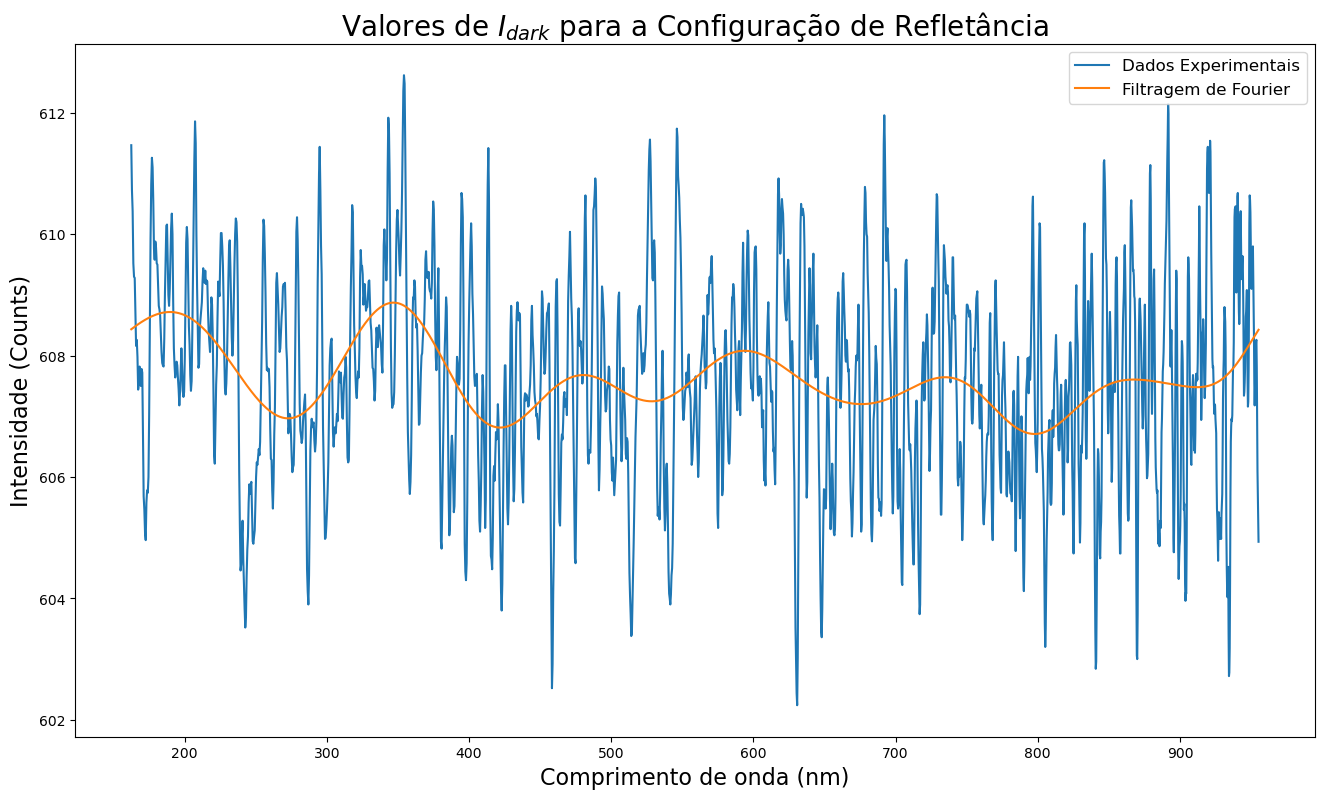

In [6]:
# DARK-T

ck = np.fft.rfft(darkT)
ck[10:] *= 0
darkT2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{dark}$ para a Configuração de Transmitância", fontsize=20)
plt.plot(xx,darkT, label="Dados Experimentais")
plt.plot(xx,darkT2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

# DARK-R

ck = np.fft.rfft(darkR)
ck[10:] *= 0
darkR2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{dark}$ para a Configuração de Refletância", fontsize=20)
plt.plot(xx,darkR, label="Dados Experimentais")
plt.plot(xx,darkR2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

[438.974 634.743 635.136 635.53  635.923]


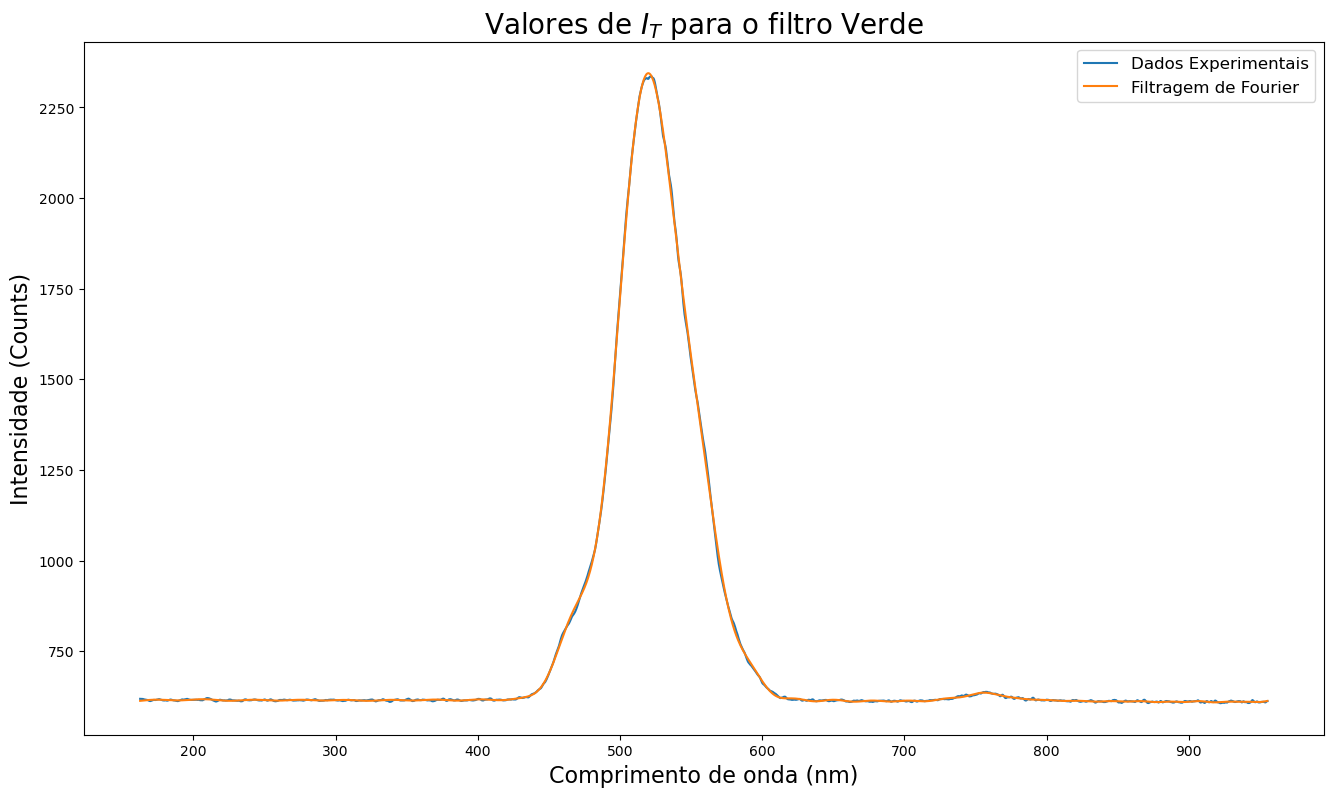

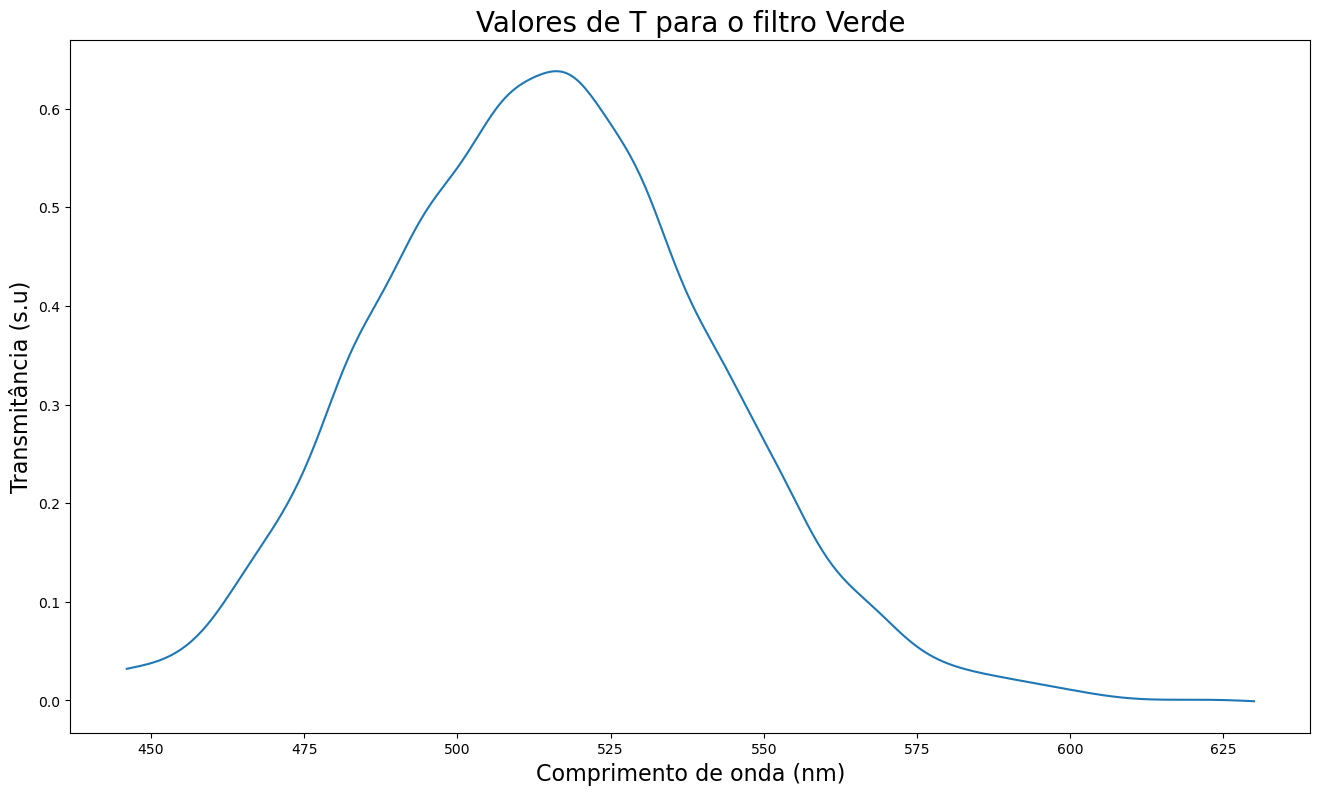

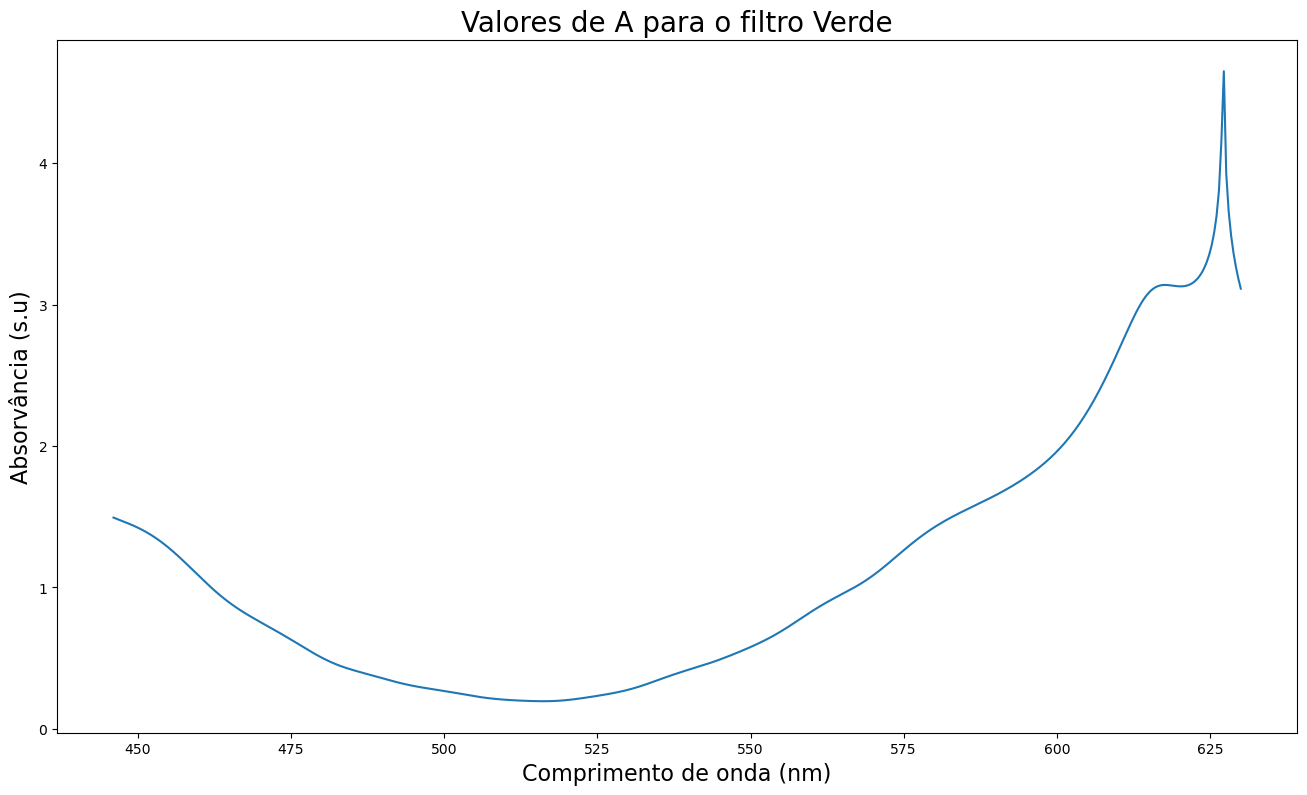

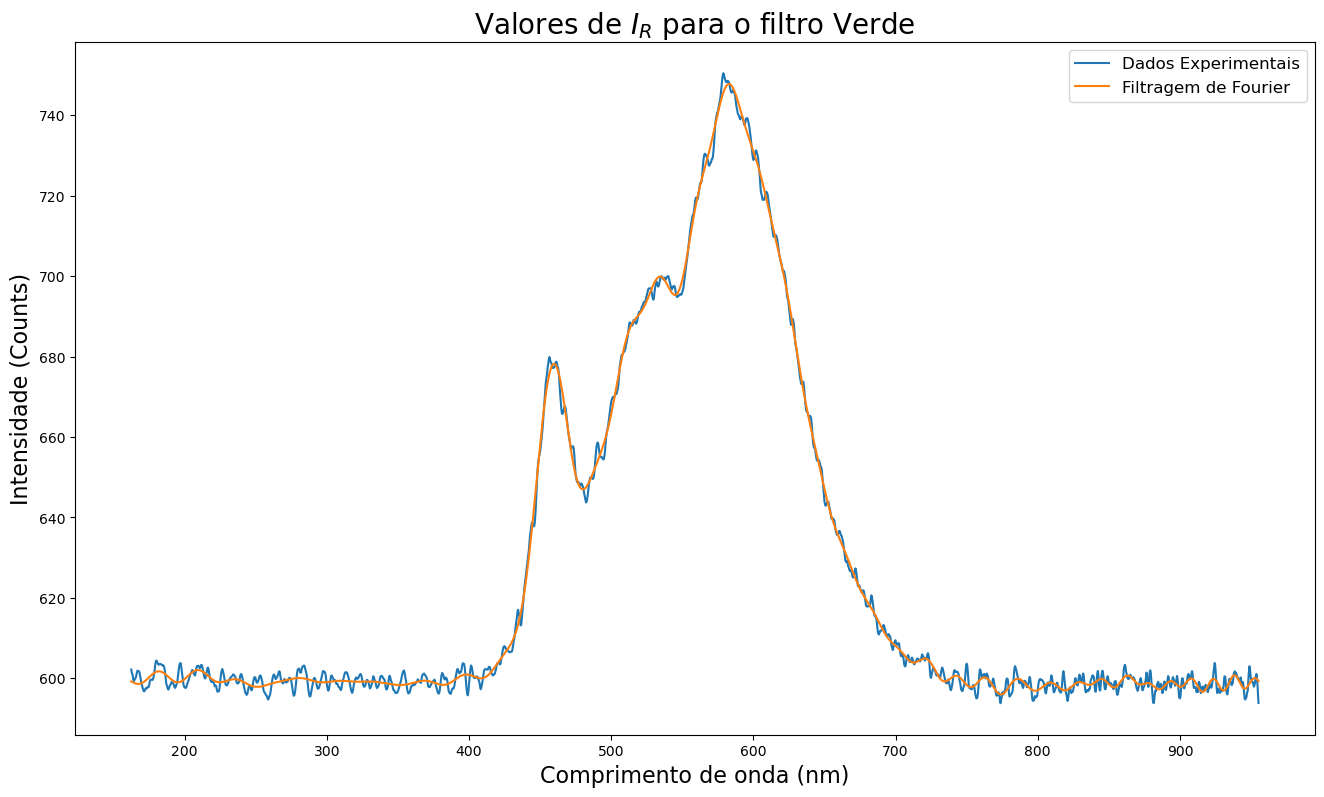

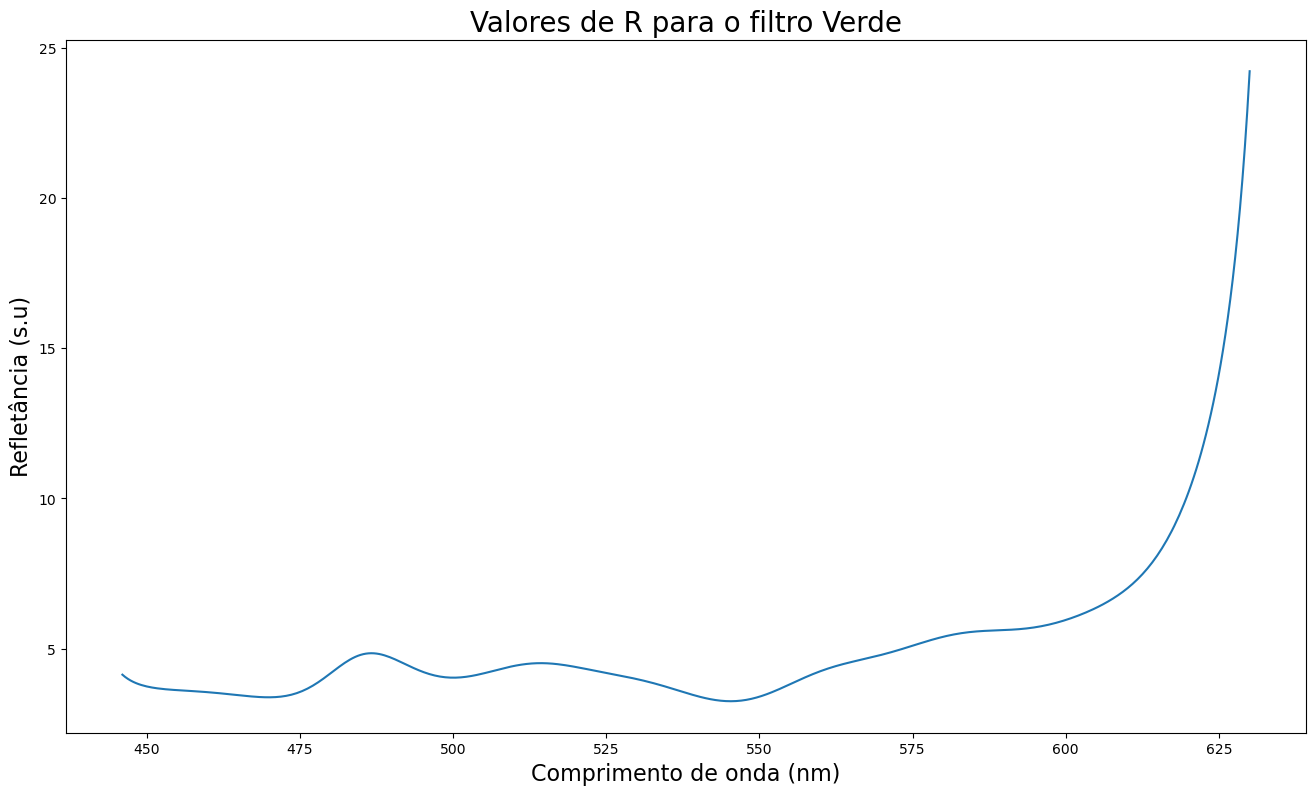

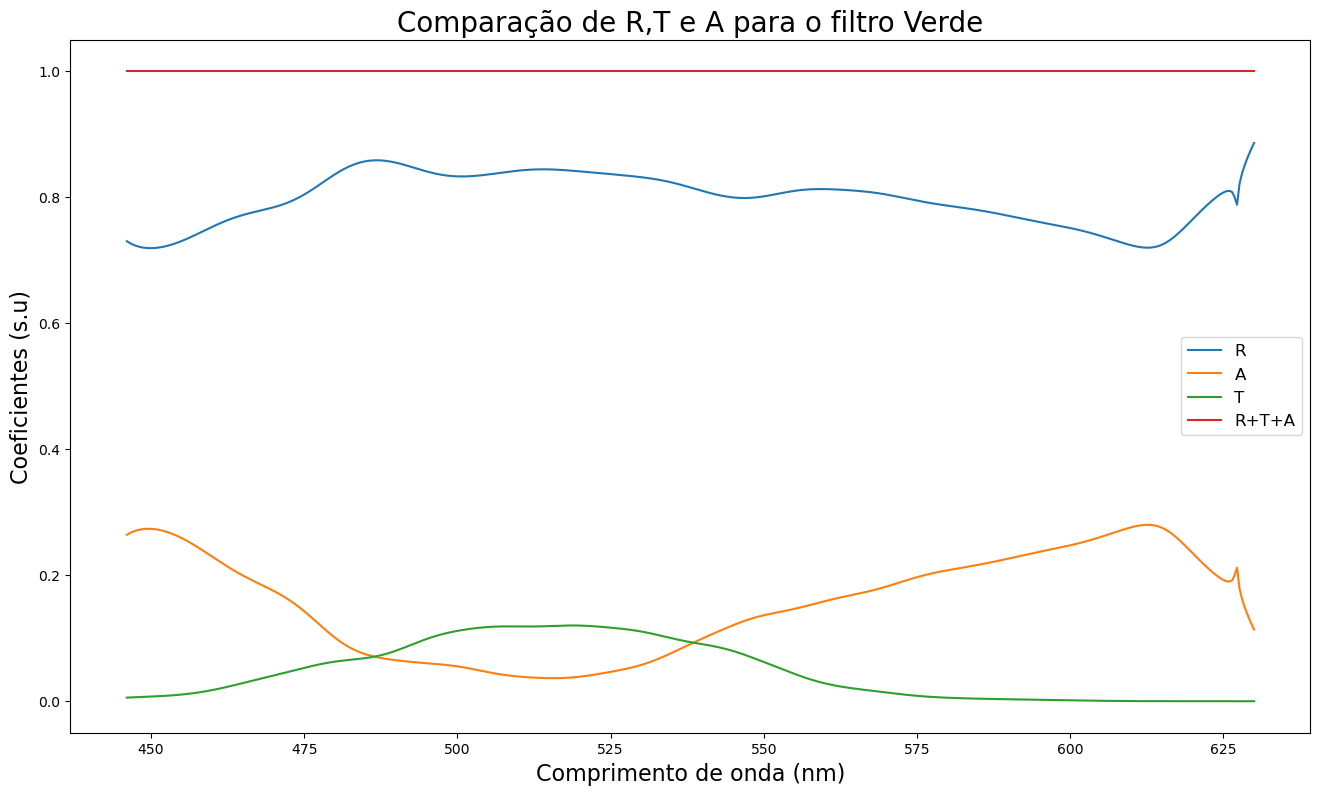

In [7]:
### VERDE FINAL

# VERDE-T
ck = np.fft.rfft(verdeT)
ck[30:] *= 0
verdeT2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{T}$ para o filtro Verde", fontsize=20)
plt.plot(xx,verdeT, label="Dados Experimentais")
plt.plot(xx,verdeT2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

TTverde = (verdeT2-darkT2)/(refTP2-darkT2)

plt.figure(figsize=(16,9))
plt.title("Valores de T para o filtro Verde", fontsize=20)
plt.plot(xx[610:1050], TTverde[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Transmitância (s.u)", fontsize=16)


# VERDE-A
AAverde = np.log10(1/np.abs(TTverde))

plt.figure(figsize=(16,9))
plt.title("Valores de A para o filtro Verde", fontsize=20)
plt.plot(xx[610:1050],np.abs(AAverde)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Absorvância (s.u)", fontsize=16)


# VERDE-R
ck = np.fft.rfft(verdeR)
ck[40:] *= 0
verdeR2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{R}$ para o filtro Verde", fontsize=20)
plt.plot(xx,verdeR, label="Dados Experimentais")
plt.plot(xx,verdeR2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

RRverde = (verdeR2-darkR2)/(refRP2-darkR2)
print(xx[np.argpartition(RRverde, -5)[-5:]])

plt.figure(figsize=(16,9))
plt.title("Valores de R para o filtro Verde", fontsize=20)
plt.plot(xx[610:1050], np.abs(RRverde)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Refletância (s.u)", fontsize=16)


# Comparar Verde
## Normalizar
TOTverde = RRverde + AAverde + TTverde
RRverde = RRverde/TOTverde
AAverde = AAverde/TOTverde
TTverde = TTverde/TOTverde

## Sobreposição
plt.figure(figsize=(16,9))
plt.title(r"Comparação de R,T e A para o filtro Verde", fontsize=20)
plt.plot(xx[610:1050], RRverde[610:1050], label="R")
plt.plot(xx[610:1050], AAverde[610:1050], label="A")
plt.plot(xx[610:1050], TTverde[610:1050], label="T")
plt.plot(xx[610:1050], (RRverde + AAverde + TTverde)[610:1050], label="R+T+A")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Coeficientes (s.u)", fontsize=16)
plt.legend(fontsize=12)


[635.53  439.859 439.416 438.974 635.923]


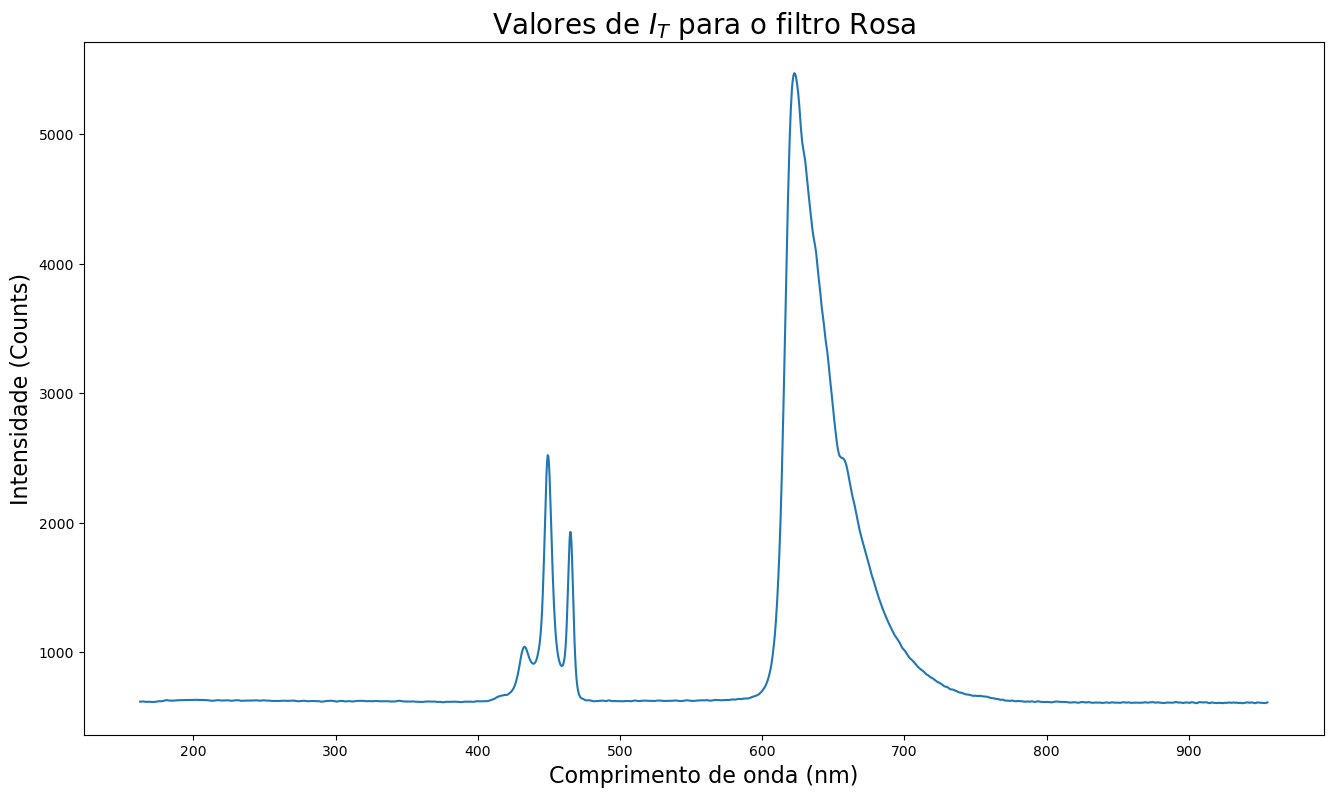

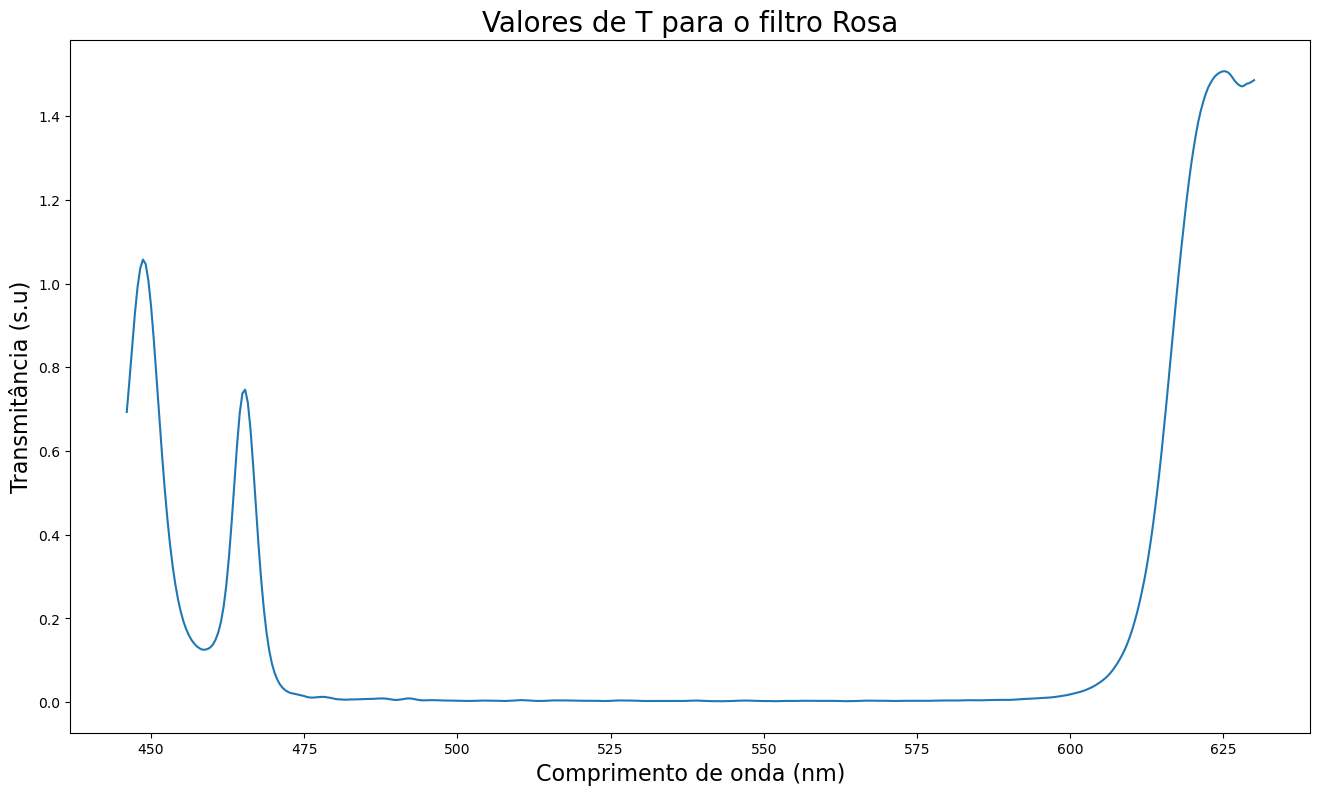

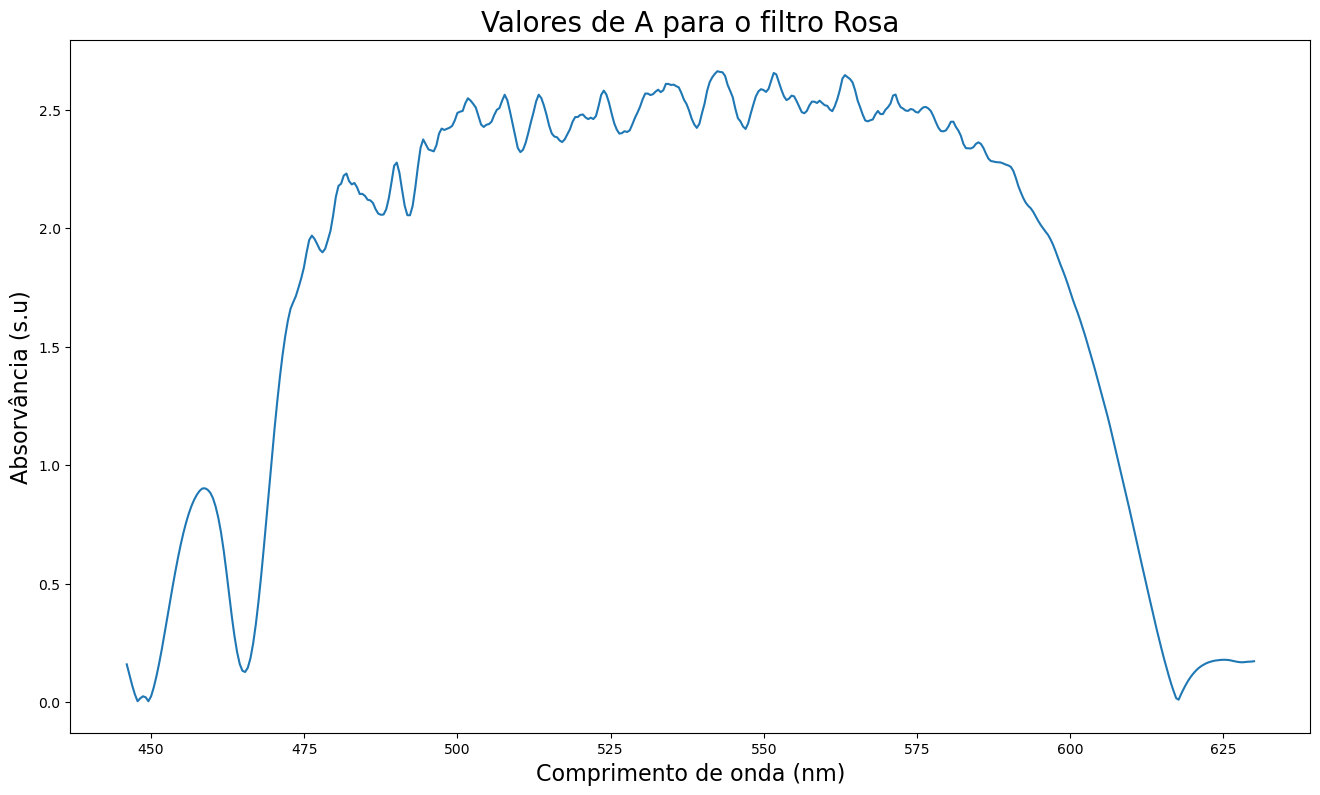

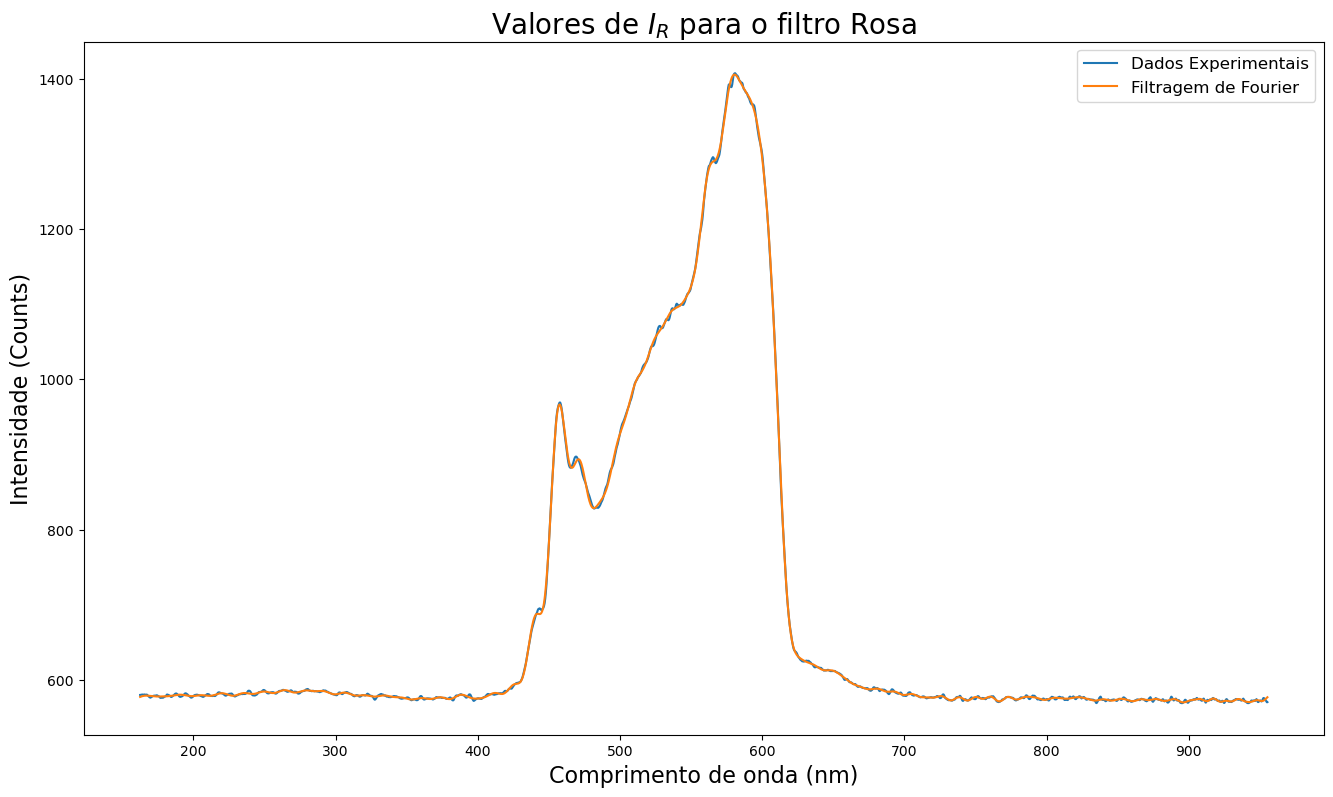

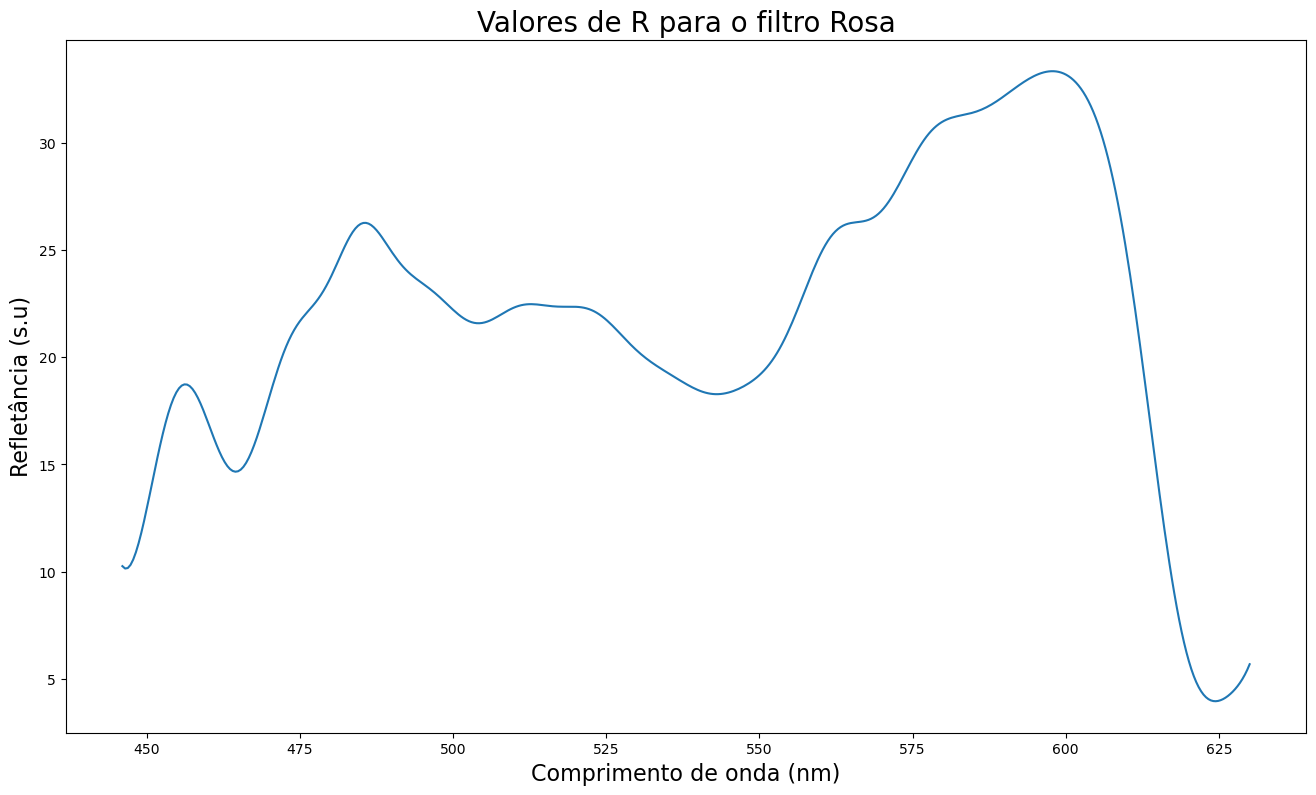

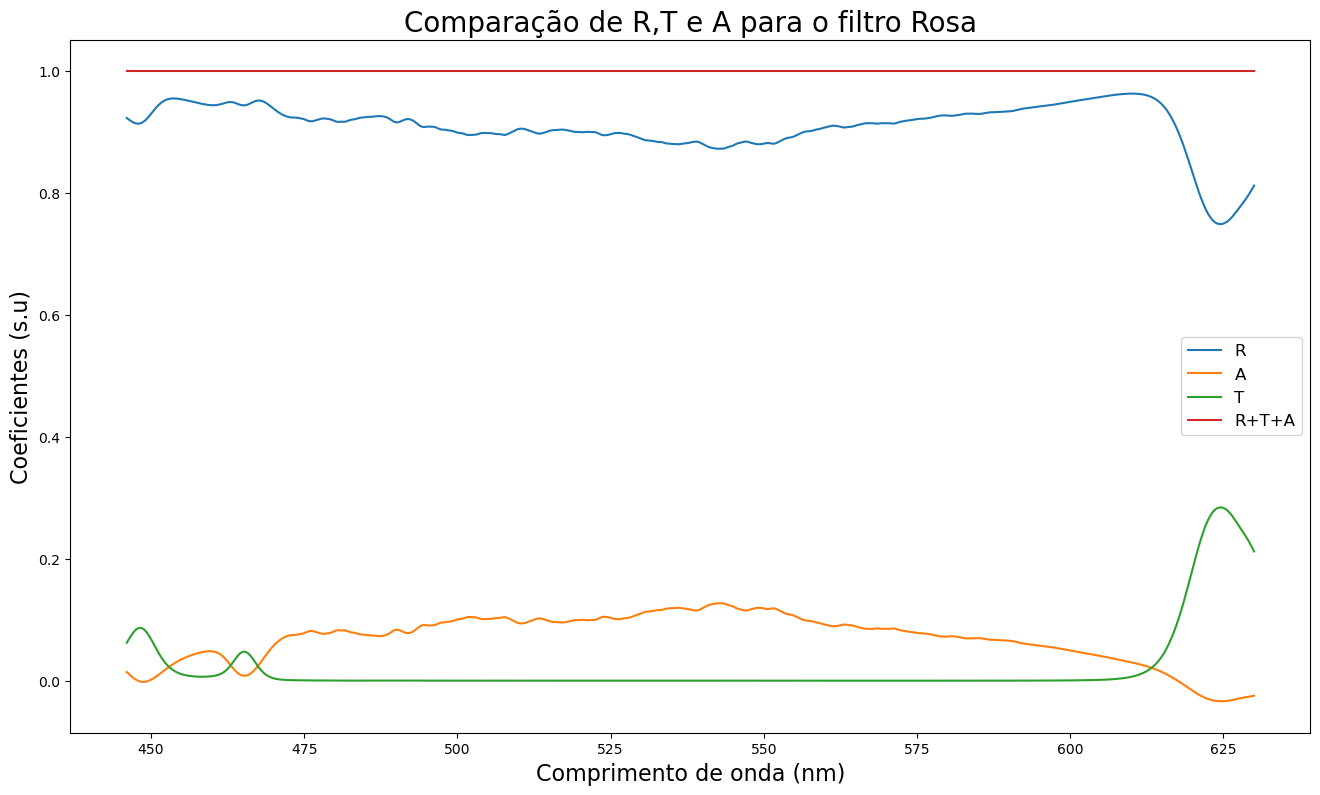

In [8]:
### ROSA FINAL

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{T}$ para o filtro Rosa", fontsize=20)
plt.plot(xx,rosaT, label="Dados Experimentais")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)


TTrosa = (rosaT-darkT2)/(refTP2-darkT2)

plt.figure(figsize=(16,9))
plt.title("Valores de T para o filtro Rosa", fontsize=20)
plt.plot(xx[610:1050], TTrosa[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Transmitância (s.u)", fontsize=16)


# ROSA-A
AArosa = np.log10(1/np.abs(TTrosa))

plt.figure(figsize=(16,9))
plt.title("Valores de A para o filtro Rosa", fontsize=20)
plt.plot(xx[610:1050],np.abs(AArosa)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Absorvância (s.u)", fontsize=16)


# ROSA-R
ck = np.fft.rfft(rosaR)
ck[70:] *= 0
rosaR2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{R}$ para o filtro Rosa", fontsize=20)
plt.plot(xx,rosaR, label="Dados Experimentais")
plt.plot(xx,rosaR2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

RRrosa = (rosaR2-darkR2)/(refRP2-darkR2)
print(xx[np.argpartition(RRrosa, -5)[-5:]])

plt.figure(figsize=(16,9))
plt.title("Valores de R para o filtro Rosa", fontsize=20)
plt.plot(xx[610:1050], np.abs(RRrosa)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Refletância (s.u)", fontsize=16)


# Comparar Rosa
## Normalizar
TOTrosa = RRrosa + AArosa + TTrosa
RRrosa = RRrosa/TOTrosa
AArosa = AArosa/TOTrosa
TTrosa = TTrosa/TOTrosa

## Sobreposição
plt.figure(figsize=(16,9))
plt.title(r"Comparação de R,T e A para o filtro Rosa", fontsize=20)
plt.plot(xx[610:1050], RRrosa[610:1050], label="R")
plt.plot(xx[610:1050], AArosa[610:1050], label="A")
plt.plot(xx[610:1050], TTrosa[610:1050], label="T")
plt.plot(xx[610:1050], (RRrosa + AArosa + TTrosa)[610:1050], label="R+T+A")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Coeficientes (s.u)", fontsize=16)
plt.legend(fontsize=12)

[635.53  439.859 439.416 438.974 635.923]


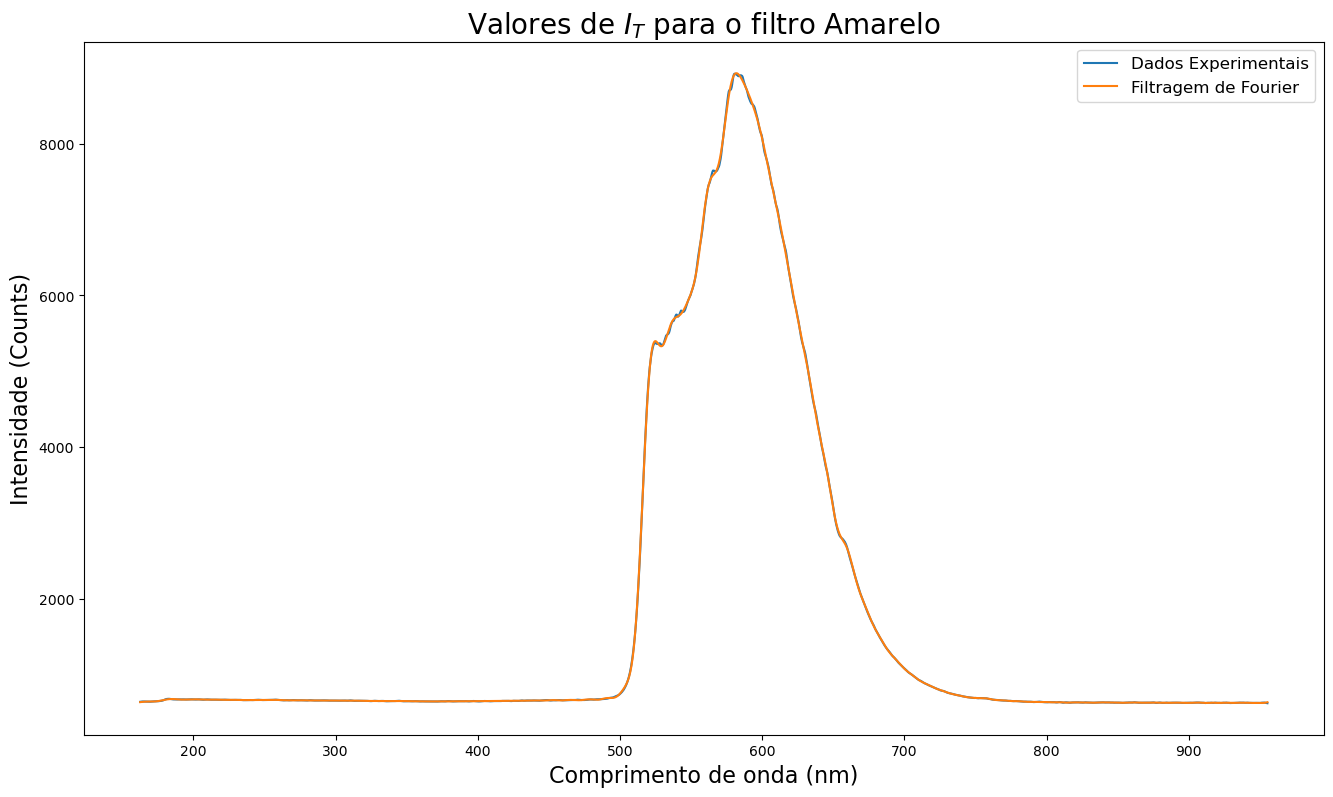

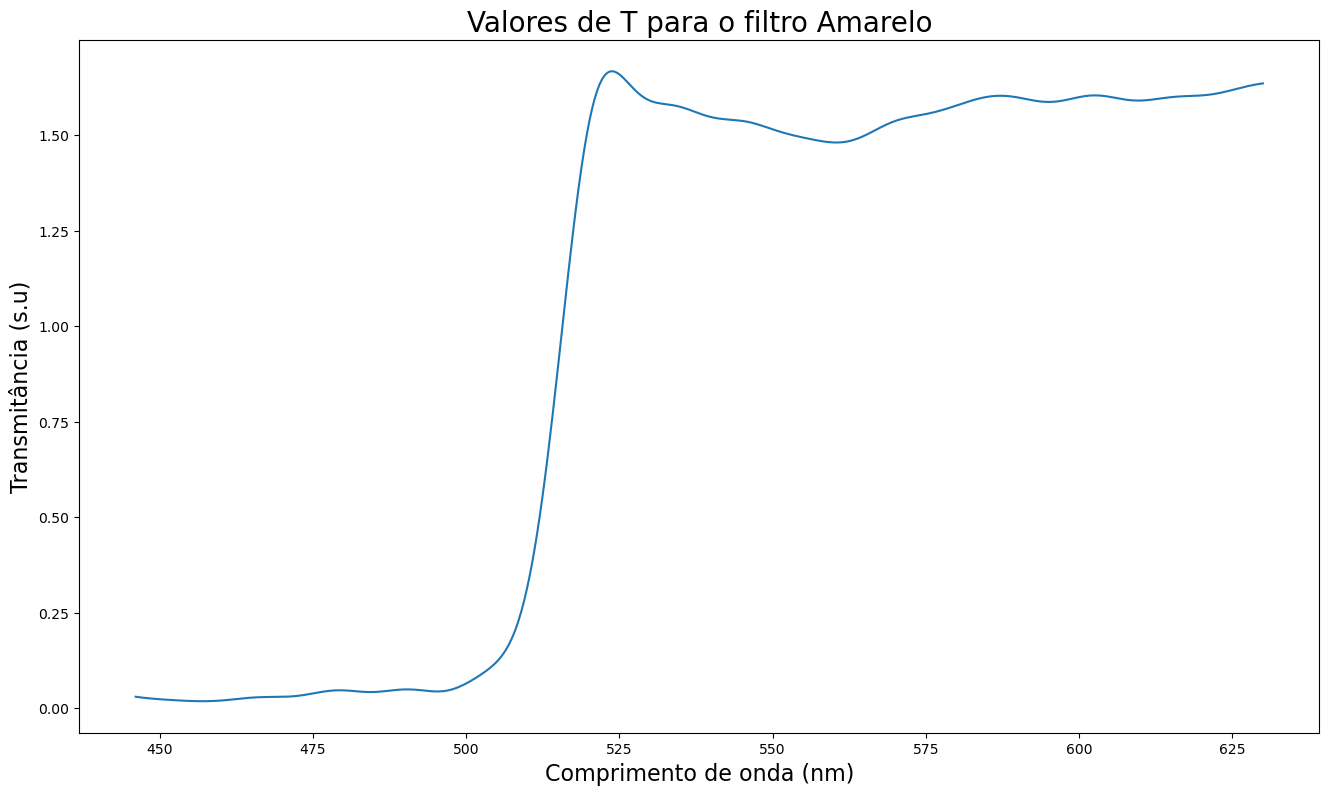

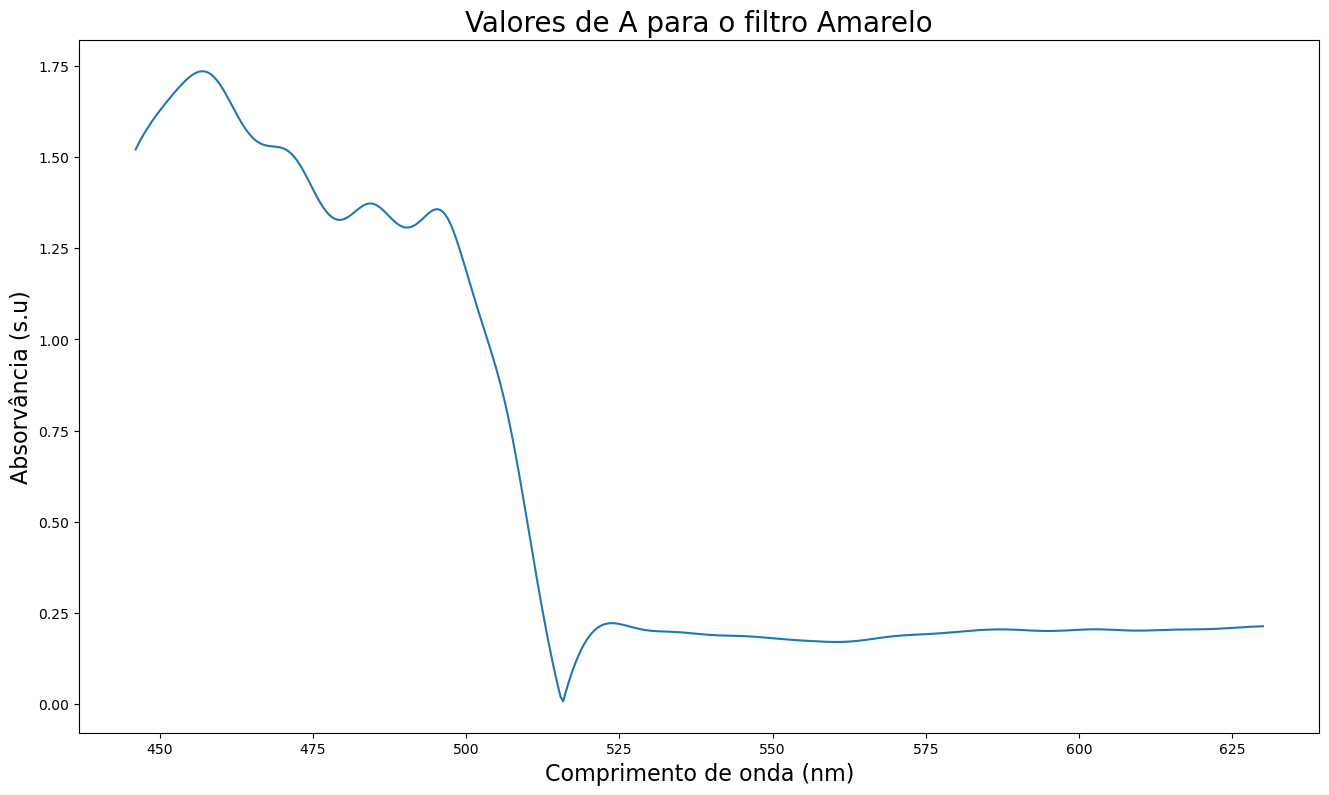

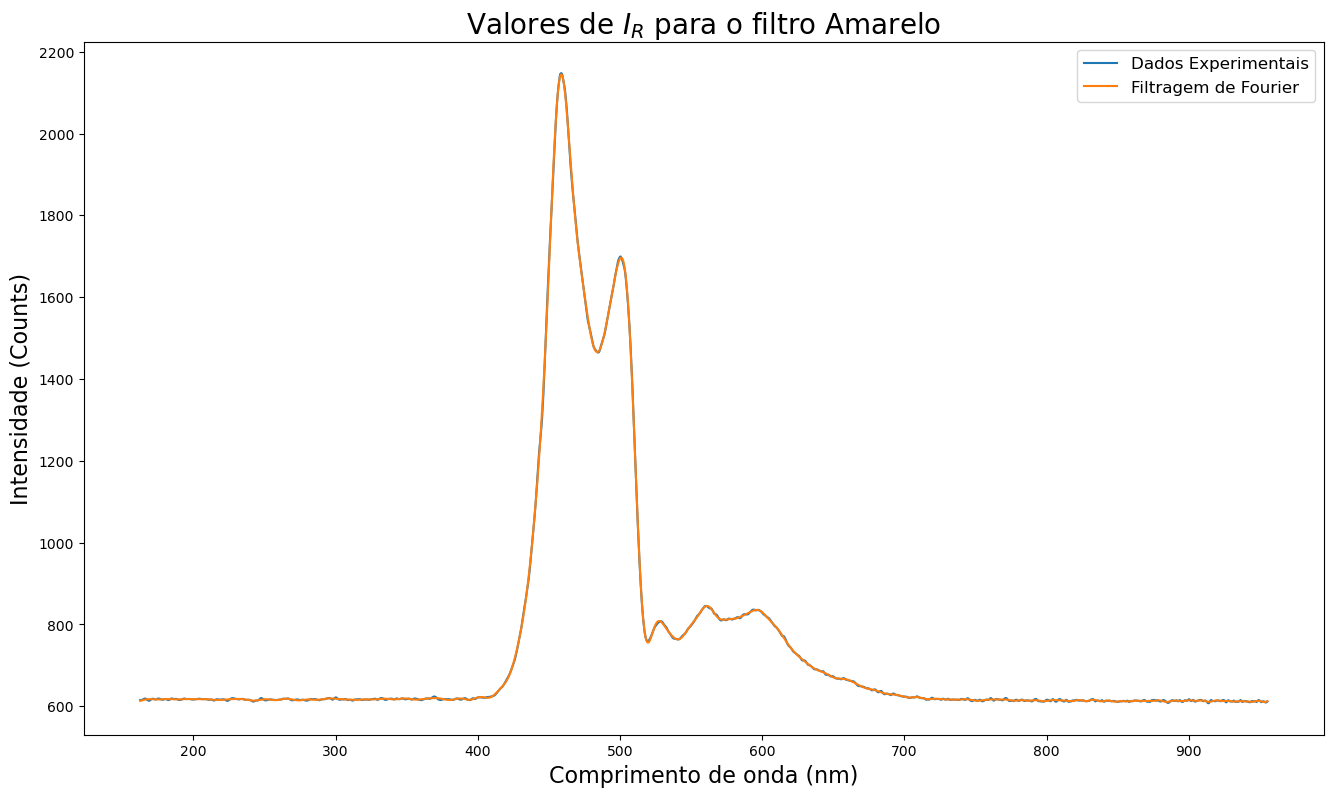

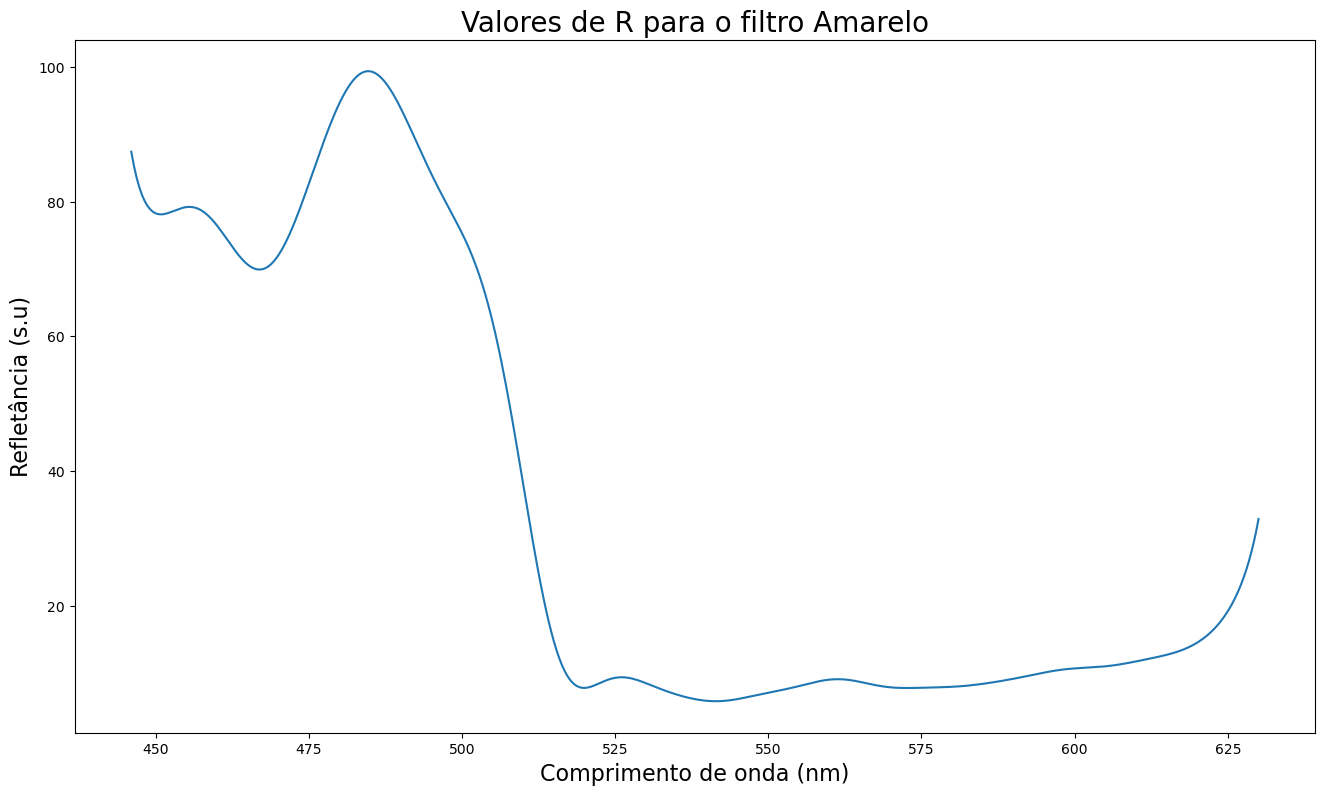

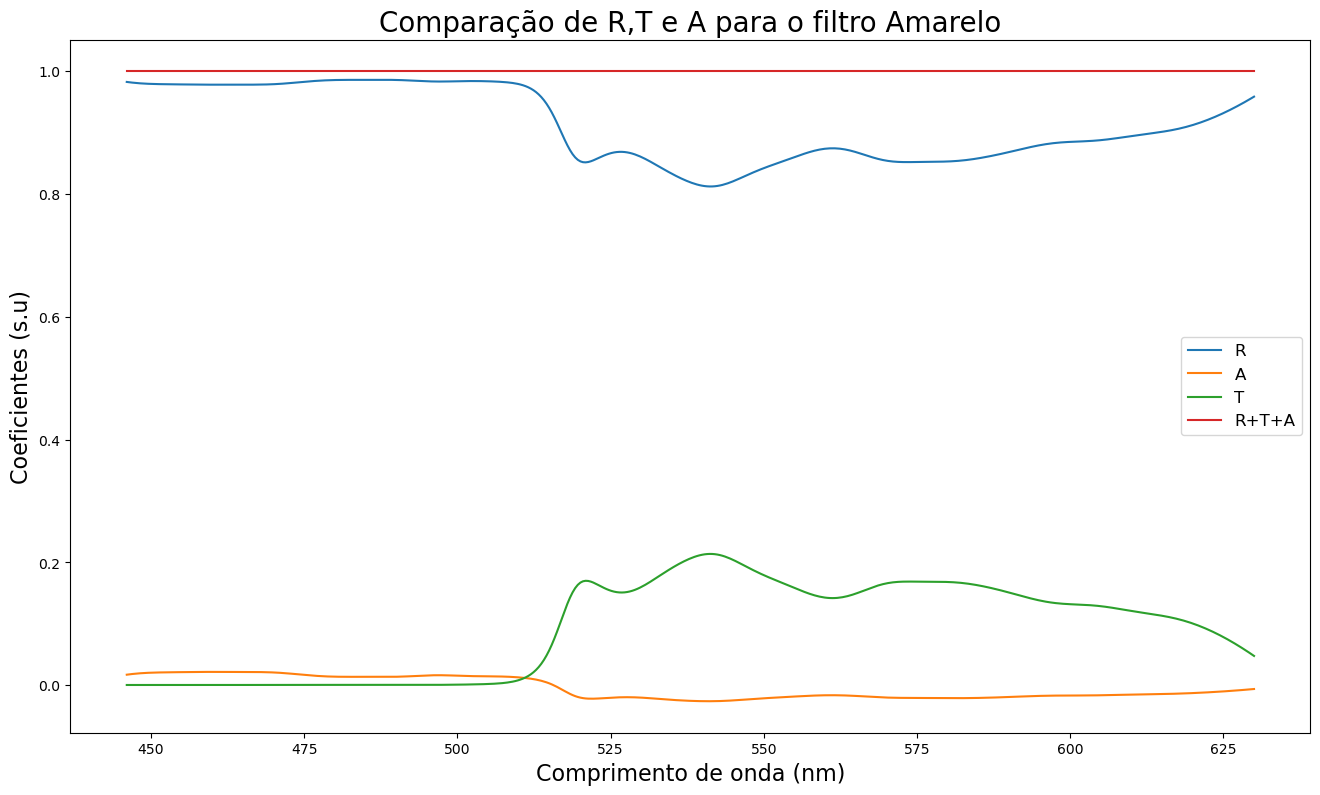

In [9]:
### AMARELO FINAL

# AMARELO-T
ck = np.fft.rfft(amareloT)
ck[70:] *= 0
amareloT2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{T}$ para o filtro Amarelo", fontsize=20)
plt.plot(xx,amareloT, label="Dados Experimentais")
plt.plot(xx,amareloT2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

TTamarelo = (amareloT2-darkT2)/(refTP2-darkT2)

plt.figure(figsize=(16,9))
plt.title("Valores de T para o filtro Amarelo", fontsize=20)
plt.plot(xx[610:1050], TTamarelo[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Transmitância (s.u)", fontsize=16)


# AMARELO-A
AAamarelo = np.log10(1/np.abs(TTamarelo))

plt.figure(figsize=(16,9))
plt.title("Valores de A para o filtro Amarelo", fontsize=20)
plt.plot(xx[610:1050],np.abs(AAamarelo)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Absorvância (s.u)", fontsize=16)


# AMARELO-R
ck = np.fft.rfft(amareloR)
ck[70:] *= 0
amareloR2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{R}$ para o filtro Amarelo", fontsize=20)
plt.plot(xx,amareloR, label="Dados Experimentais")
plt.plot(xx,amareloR2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

RRamarelo = (amareloR2-darkR2)/(refRP2-darkR2)
print(xx[np.argpartition(RRamarelo, -5)[-5:]])

plt.figure(figsize=(16,9))
plt.title("Valores de R para o filtro Amarelo", fontsize=20)
plt.plot(xx[610:1050], np.abs(RRamarelo)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Refletância (s.u)", fontsize=16)


# Comparar Amarelo
## Normalizar
TOTamarelo = RRamarelo + AAamarelo + TTamarelo
RRamarelo = RRamarelo/TOTamarelo
AAamarelo = AAamarelo/TOTamarelo
TTamarelo = TTamarelo/TOTamarelo

## Sobreposição
plt.figure(figsize=(16,9))
plt.title(r"Comparação de R,T e A para o filtro Amarelo", fontsize=20)
plt.plot(xx[610:1050], RRamarelo[610:1050], label="R")
plt.plot(xx[610:1050], AAamarelo[610:1050], label="A")
plt.plot(xx[610:1050], TTamarelo[610:1050], label="T")
plt.plot(xx[610:1050], (RRamarelo + AAamarelo + TTamarelo)[610:1050], label="R+T+A")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Coeficientes (s.u)", fontsize=16)
plt.legend(fontsize=12)

[438.974 634.743 635.923 635.136 635.53 ]


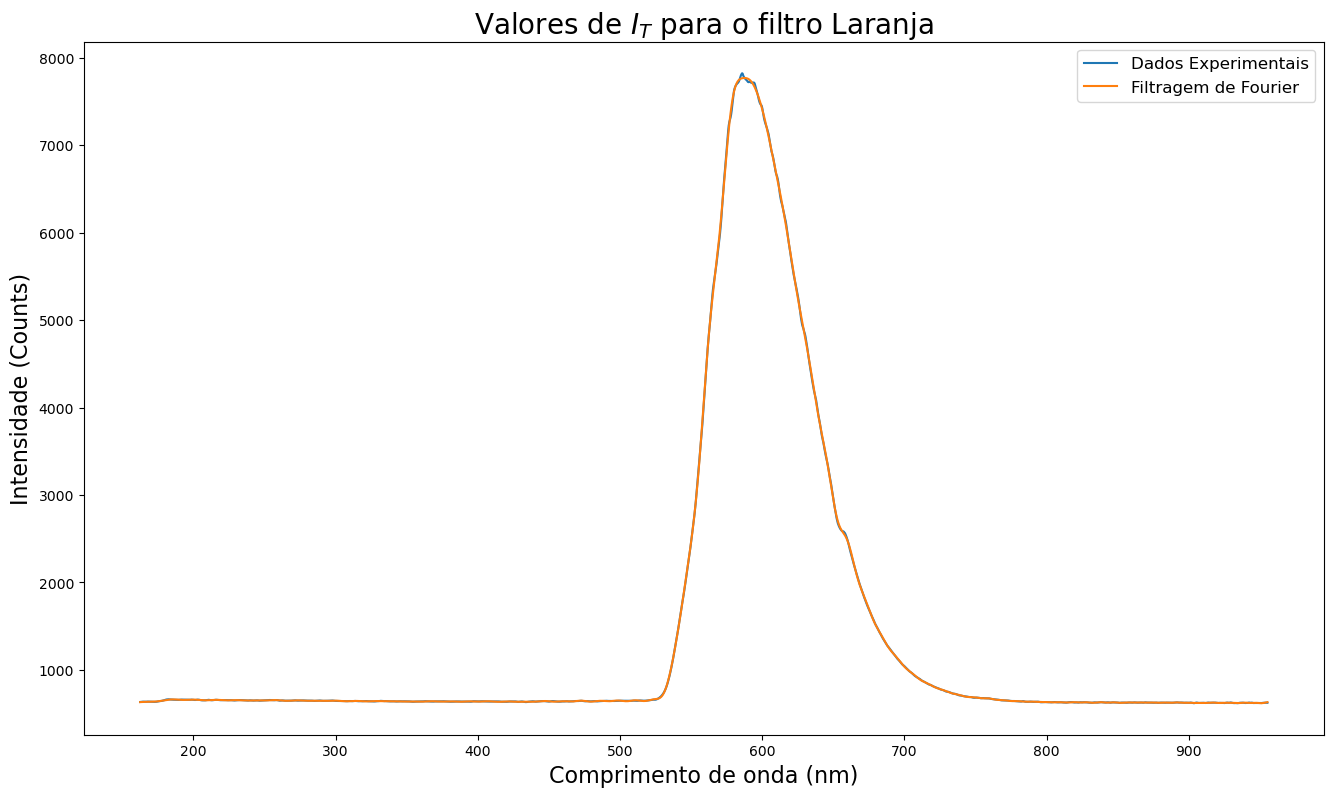

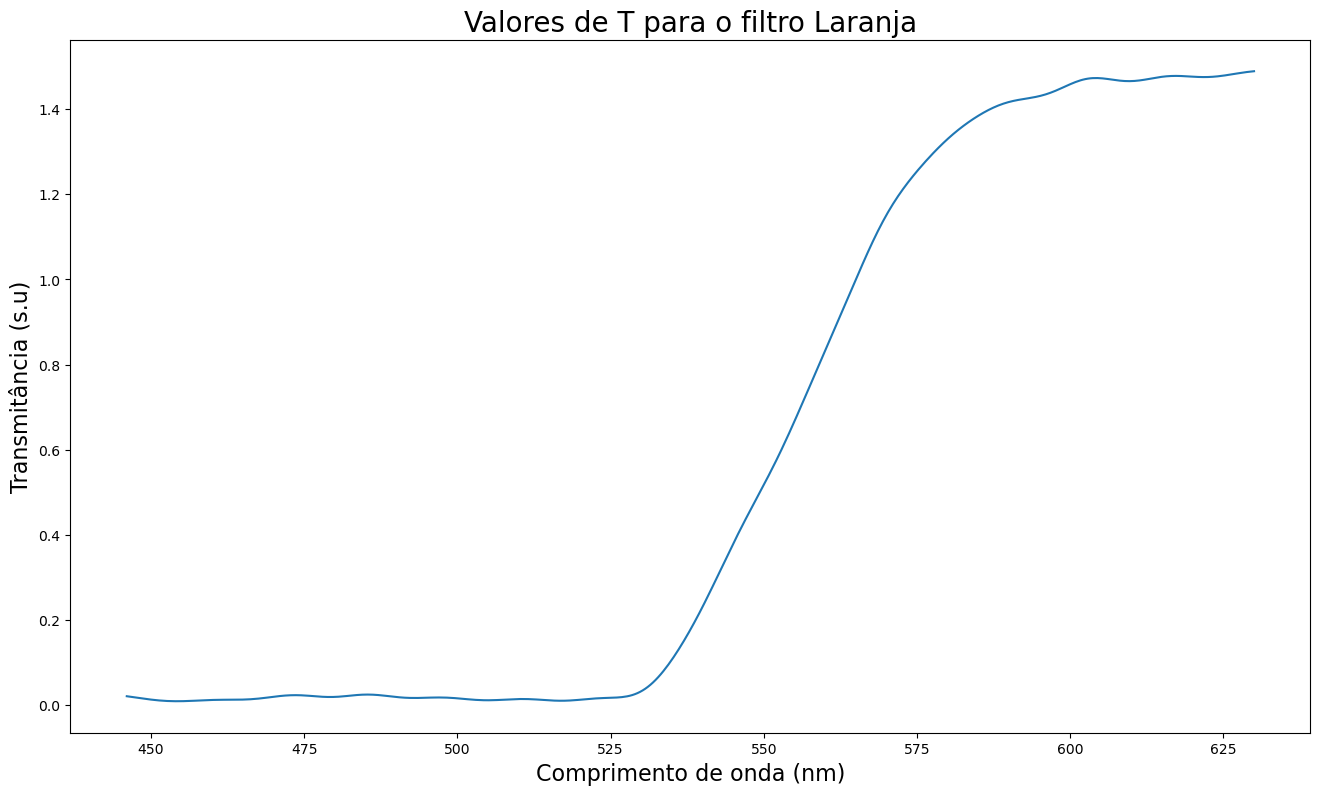

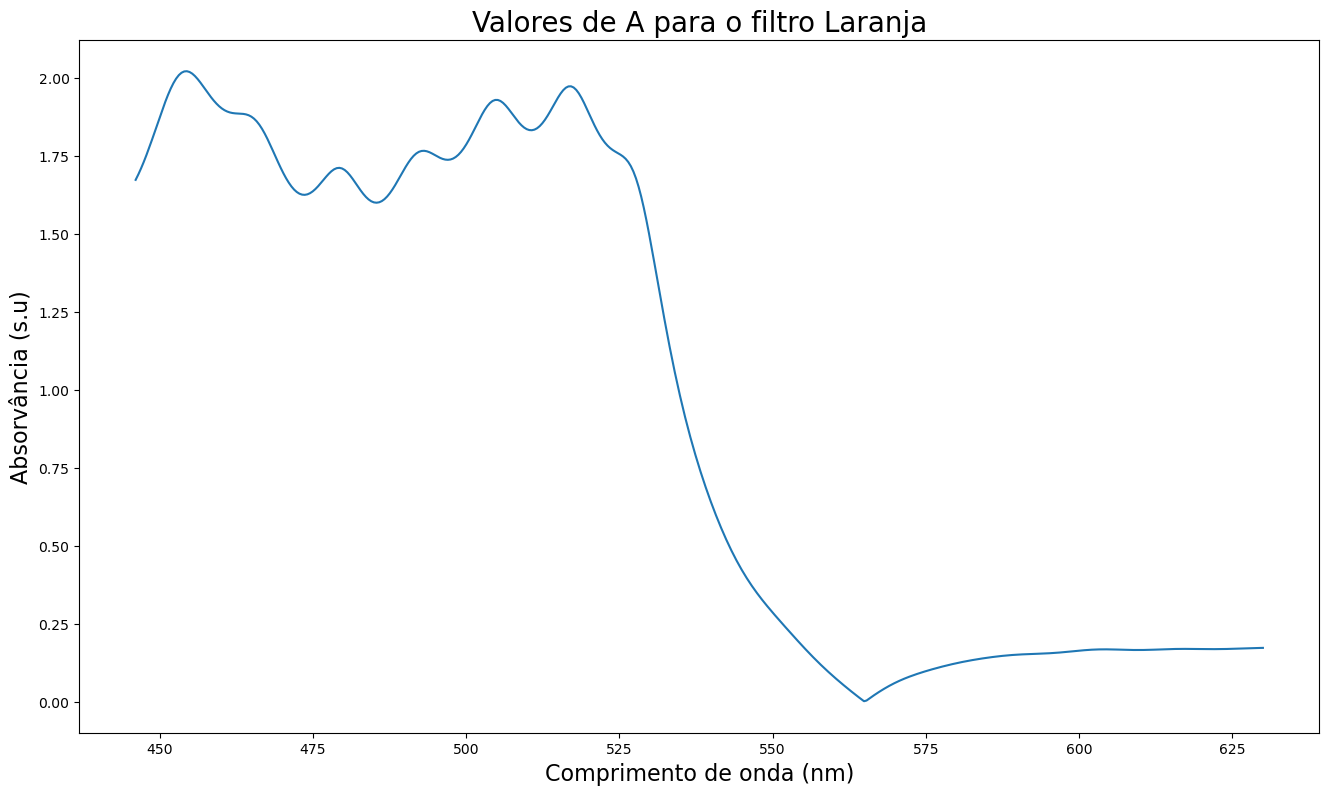

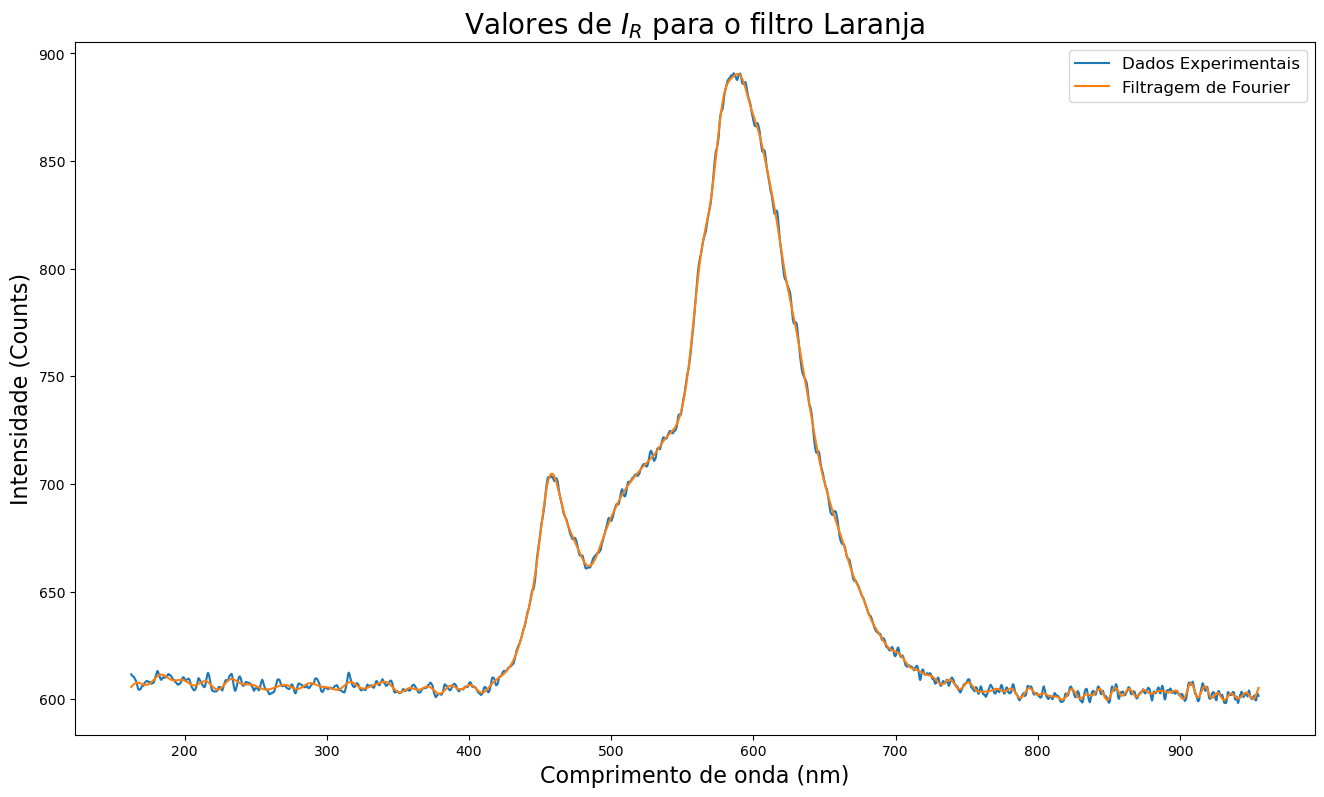

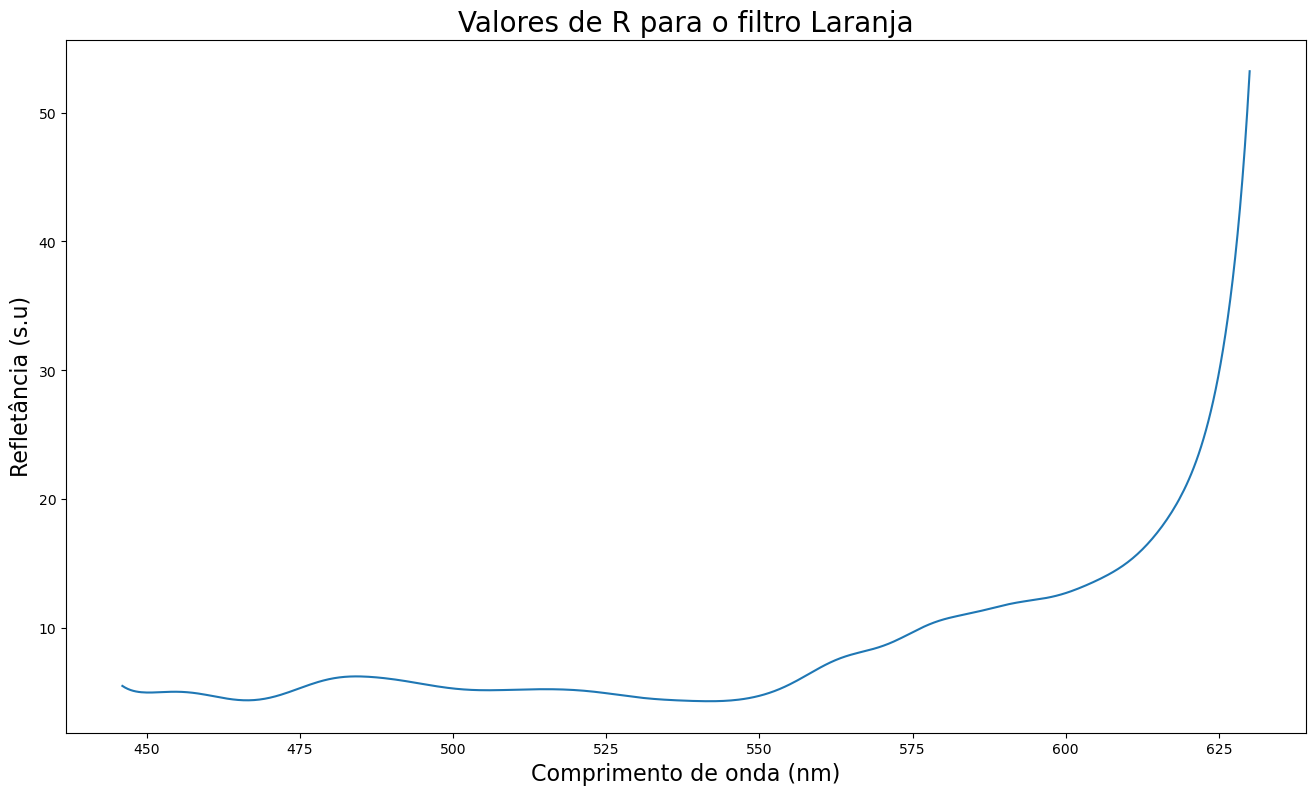

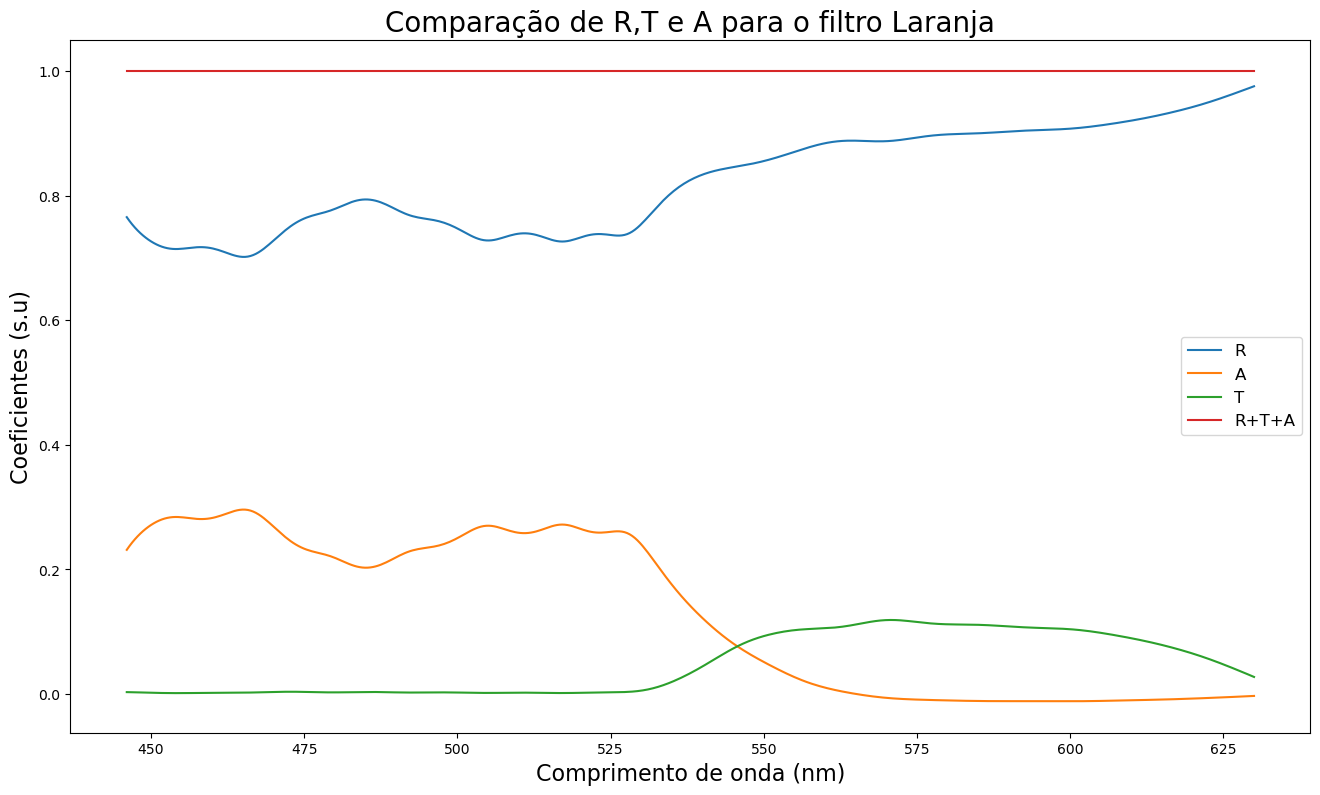

In [15]:
### LARANJA FINAL

# LARANJA-T
ck = np.fft.rfft(laranjaT)
ck[70:] *= 0
laranjaT2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{T}$ para o filtro Laranja", fontsize=20)
plt.plot(xx,laranjaT, label="Dados Experimentais")
plt.plot(xx,laranjaT2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

TTlaranja = (laranjaT2-darkT2)/(refTP2-darkT2)

plt.figure(figsize=(16,9))
plt.title("Valores de T para o filtro Laranja", fontsize=20)
plt.plot(xx[610:1050], TTlaranja[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Transmitância (s.u)", fontsize=16)


# LARANJA-A
AAlaranja = np.log10(1/np.abs(TTlaranja))

plt.figure(figsize=(16,9))
plt.title("Valores de A para o filtro Laranja", fontsize=20)
plt.plot(xx[610:1050],np.abs(AAlaranja)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Absorvância (s.u)", fontsize=16)


# LARANJA-R
ck = np.fft.rfft(laranjaR)
ck[70:] *= 0
laranjaR2 = np.fft.irfft(ck)

plt.figure(figsize=(16,9))
plt.title(r"Valores de $I_{R}$ para o filtro Laranja", fontsize=20)
plt.plot(xx,laranjaR, label="Dados Experimentais")
plt.plot(xx,laranjaR2, label="Filtragem de Fourier")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Intensidade (Counts)", fontsize=16)
plt.legend(fontsize=12)

RRlaranja = (laranjaR2-darkR2)/(refRP2-darkR2)
print(xx[np.argpartition(RRlaranja, -5)[-5:]])

plt.figure(figsize=(16,9))
plt.title("Valores de R para o filtro Laranja", fontsize=20)
plt.plot(xx[610:1050], np.abs(RRlaranja)[610:1050])
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Refletância (s.u)", fontsize=16)


# Comparar Laranja
## Normalizar
TOTlaranja = RRlaranja + AAlaranja + TTlaranja
RRlaranja = RRlaranja/TOTlaranja
AAlaranja = AAlaranja/TOTlaranja
TTlaranja = TTlaranja/TOTlaranja

## Sobreposição
plt.figure(figsize=(16,9))
plt.title(r"Comparação de R,T e A para o filtro Laranja", fontsize=20)
plt.plot(xx[610:1050], RRlaranja[610:1050], label="R")
plt.plot(xx[610:1050], AAlaranja[610:1050], label="A")
plt.plot(xx[610:1050], TTlaranja[610:1050], label="T")
plt.plot(xx[610:1050], (RRlaranja + AAlaranja + TTlaranja)[610:1050], label="R+T+A")
plt.xlabel("Comprimento de onda (nm)", fontsize=16)
plt.ylabel("Coeficientes (s.u)", fontsize=16)
plt.legend(fontsize=12)